<a href="https://colab.research.google.com/github/SriSabarish3/Zidio-Development-Project/blob/main/ZIDIO_DEVELOPMENT_INTERNSHIP_BY_SRISABARISH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#LOADING THE DATASETS
deliveries_df = pd.read_csv('deliveries.csv', on_bad_lines='skip')
matches_df = pd.read_csv('matches.csv')

In [9]:
deliveries_df.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0           1     legbyes          0              NaN            NaN     NaN  
1           0         NaN          0              NaN            NaN     NaN  
2           1       wides          0              NaN            NaN     NaN  
3           0         NaN          0              NaN            NaN     NaN  
4           0         NaN          0              NaN            NaN     NaN

In [10]:
matches_df.head()

id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkata Knight Riders  Royal Challengers Bangalore         field   
1          Chennai Super Kings          Chennai Super Kings           bat   
2             Rajasthan Royals             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4              Deccan Chargers              Deccan Chargers           bat   

                        winner   result  result_margin  target_runs  \
0        Kolkata Knight Riders     runs          140.0        223.0   
1          Chennai Super Kings     runs           33.0        241.0   
2             Delhi Daredevils  wickets            9.0        130.0   
3  Royal Challengers Bangalore  wickets            5.0        166.0   
4        Kolkata Knight Riders  wickets            5.0        111.0   

   target_overs super_over method    umpire1         umpire2  
0          20.0          N    NaN  Asad Rauf     RE Koertzen  
1          20.0          N    NaN  MR Benson      SL Shastri  
2          20.0          N    NaN  Aleem Dar  GA Pratapkumar  
3          20.0          N    NaN   SJ Davis       DJ Harper  
4          20.0          N    NaN  BF Bowden     K Hariharan

In [11]:
matches_df.shape

(1095, 20)

In [12]:
deliveries_df.shape

(260920, 17)

In [13]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [14]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [15]:
matches_df.describe()

id  result_margin  target_runs  target_overs
count  1.095000e+03    1076.000000  1092.000000   1092.000000
mean   9.048283e+05      17.259294   165.684066     19.759341
std    3.677402e+05      21.787444    33.427048      1.581108
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      20.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000

In [16]:
deliveries_df.describe()

match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.000000       2.000000   
50%    9.809670e+05       1.000000       9.000000       4.000000   
75%    1.254066e+06       2.000000      14.000000       5.000000   
max    1.426312e+06       6.000000      19.000000      11.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  
count  260920.000000  260920.000000  260920.000000  260920.000000  
mean        1.265001       0.067806       1.332807       0.049632  
std         1.639298       0.343265       1.626416       0.217184  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         1.000000       0.000000       1.000000       0.000000  
75%         1.000000       0.000000       1.000000       0.000000  
max         6.000000       7.000000       7.000000       1.000000

In [17]:
matches_df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [18]:
matches_df['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [19]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [20]:
deliveries_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [21]:
deliveries_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

# **TEAM ANALYSIS**


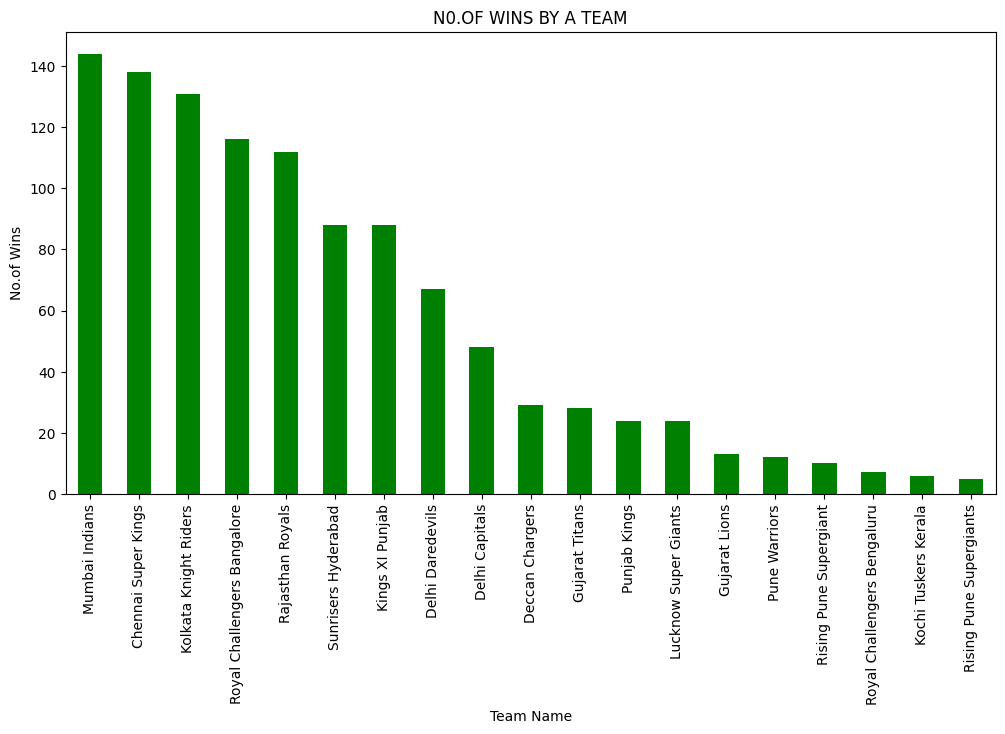

In [22]:
matches_df['winner'].value_counts().plot.bar(figsize=(12, 6),color='green')
plt.title("N0.OF WINS BY A TEAM",size=12)
plt.xlabel("Team Name",size=10)
plt.ylabel("No.of Wins",size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

Teams with the Most Wins:
winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Sunrisers Hyderabad             88
Kings XI Punjab                 88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


<ipython-input-24-4b5ac729b290>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')


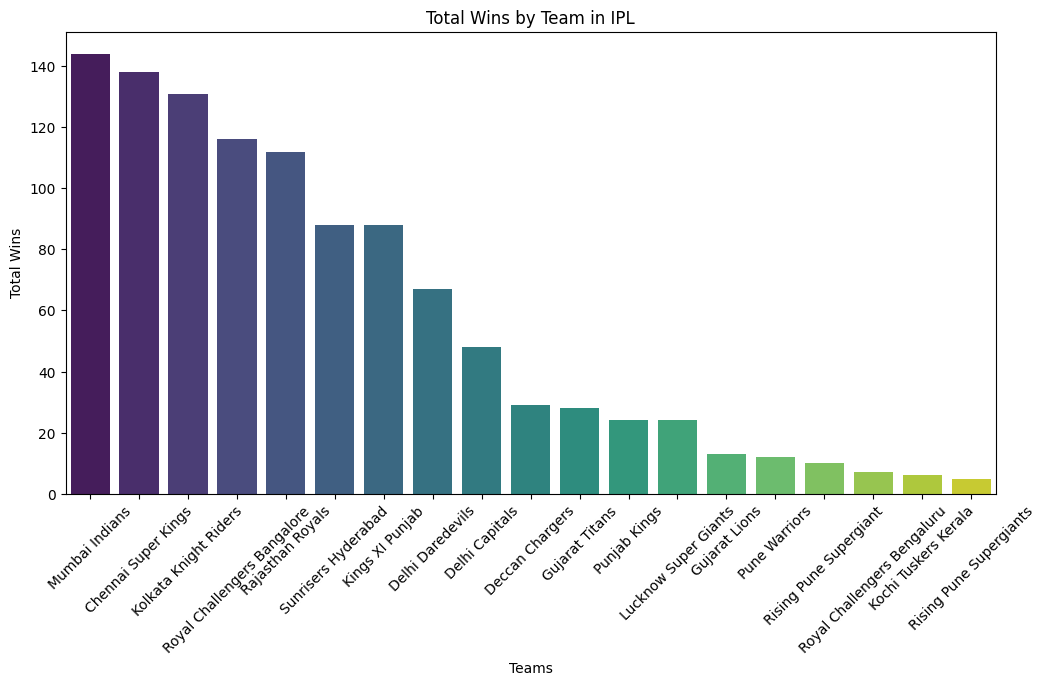

The team with the most wins is Mumbai Indians with 144 wins.


In [24]:
# Count the number of wins for each team
team_wins = matches_df['winner'].value_counts()

# Display the results
print("Teams with the Most Wins:")
print(team_wins)

# Plot the results
plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Teams")
plt.ylabel("Total Wins")
plt.title("Total Wins by Team in IPL")
plt.show()

# Analysis
most_wins_team = team_wins.idxmax()
most_wins_count = team_wins.max()
print(f"The team with the most wins is {most_wins_team} with {most_wins_count} wins.")

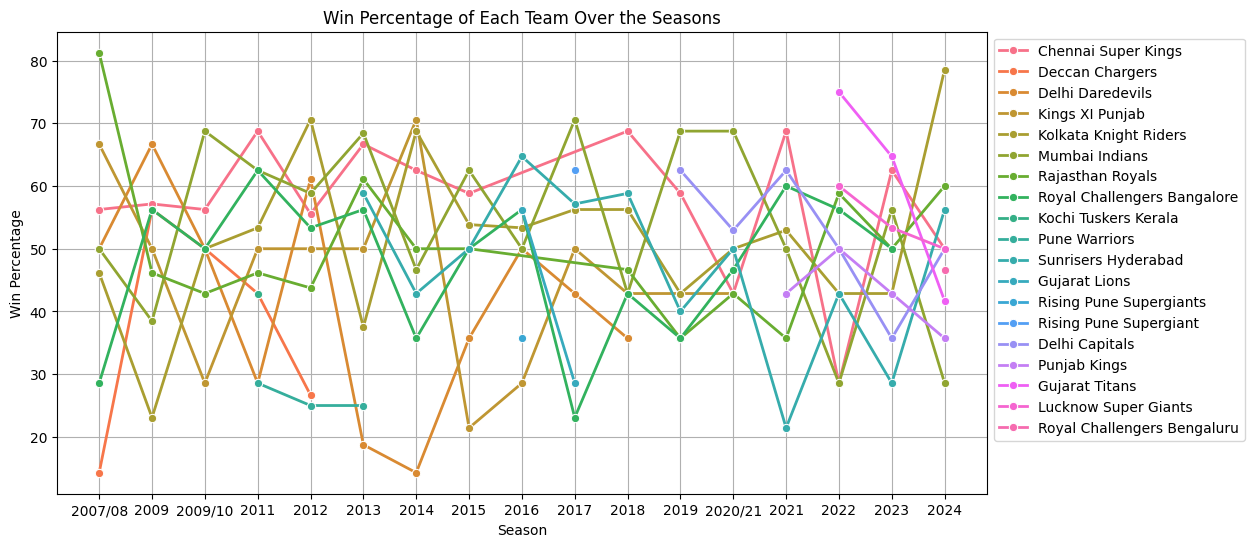

In [25]:
# Rename columns for clarity
matches_df = matches_df.rename(columns={"season": "Season", "winner": "Winner", "team1": "Team1", "team2": "Team2"})

# Count total matches played per team per season
team1_matches = matches_df.groupby(["Season", "Team1"]).size().reset_index(name="Matches_Played")
team2_matches = matches_df.groupby(["Season", "Team2"]).size().reset_index(name="Matches_Played")

# Rename columns to have a common "Team" column
team1_matches = team1_matches.rename(columns={"Team1": "Team"})
team2_matches = team2_matches.rename(columns={"Team2": "Team"})

# Merge both to get total matches per team per season
total_matches = pd.concat([team1_matches, team2_matches])
total_matches = total_matches.groupby(["Season", "Team"]).sum().reset_index()

# Count total wins per team per season
wins = matches_df.groupby(["Season", "Winner"]).size().reset_index(name="Wins")
wins = wins.rename(columns={"Winner": "Team"})  # Rename for merging

# Merge total matches and wins
win_percentage = pd.merge(wins, total_matches, on=["Season", "Team"], how="right").fillna(0)
win_percentage["Win %"] = (win_percentage["Wins"] / win_percentage["Matches_Played"]) * 100

# Plot win percentage over seasons
plt.figure(figsize=(12, 6))
sns.lineplot(data=win_percentage, x="Season", y="Win %", hue="Team", marker="o", linewidth=2)
plt.title("Win Percentage of Each Team Over the Seasons")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


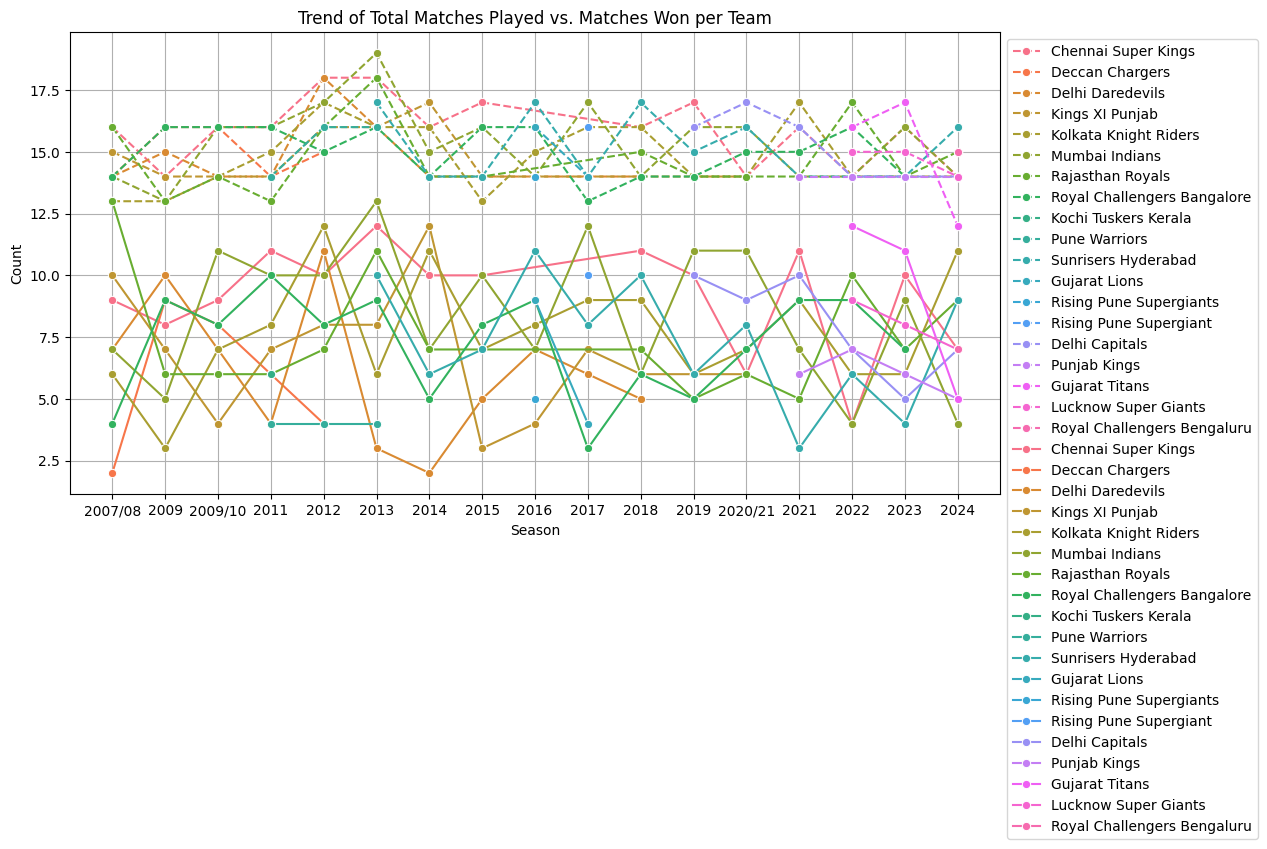

In [26]:
# Merge total matches and wins
team_performance = pd.merge(total_matches, wins, on=["Season", "Team"], how="left").fillna(0)

# Plot total matches played vs. matches won over the seasons
plt.figure(figsize=(12, 6))

sns.lineplot(data=team_performance, x="Season", y="Matches_Played", hue="Team", marker="o", linestyle="dashed")
sns.lineplot(data=team_performance, x="Season", y="Wins", hue="Team", marker="o", linestyle="solid")

plt.title("Trend of Total Matches Played vs. Matches Won per Team")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

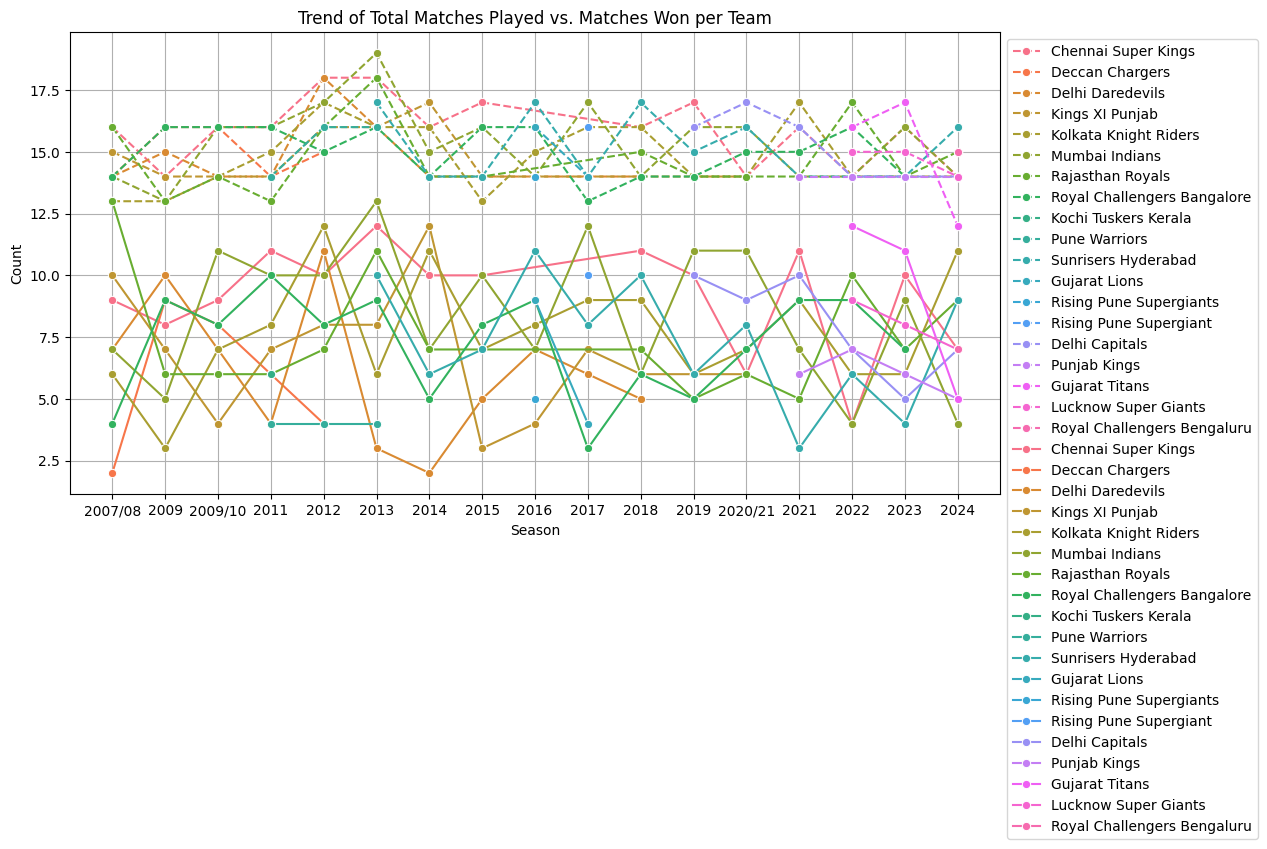

In [27]:
# Merge total matches and wins
team_performance = pd.merge(total_matches, wins, on=["Season", "Team"], how="left").fillna(0)

# Plot total matches played vs. matches won over the seasons
plt.figure(figsize=(12, 6))

sns.lineplot(data=team_performance, x="Season", y="Matches_Played", hue="Team", marker="o", linestyle="dashed")
sns.lineplot(data=team_performance, x="Season", y="Wins", hue="Team", marker="o", linestyle="solid")

plt.title("Trend of Total Matches Played vs. Matches Won per Team")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

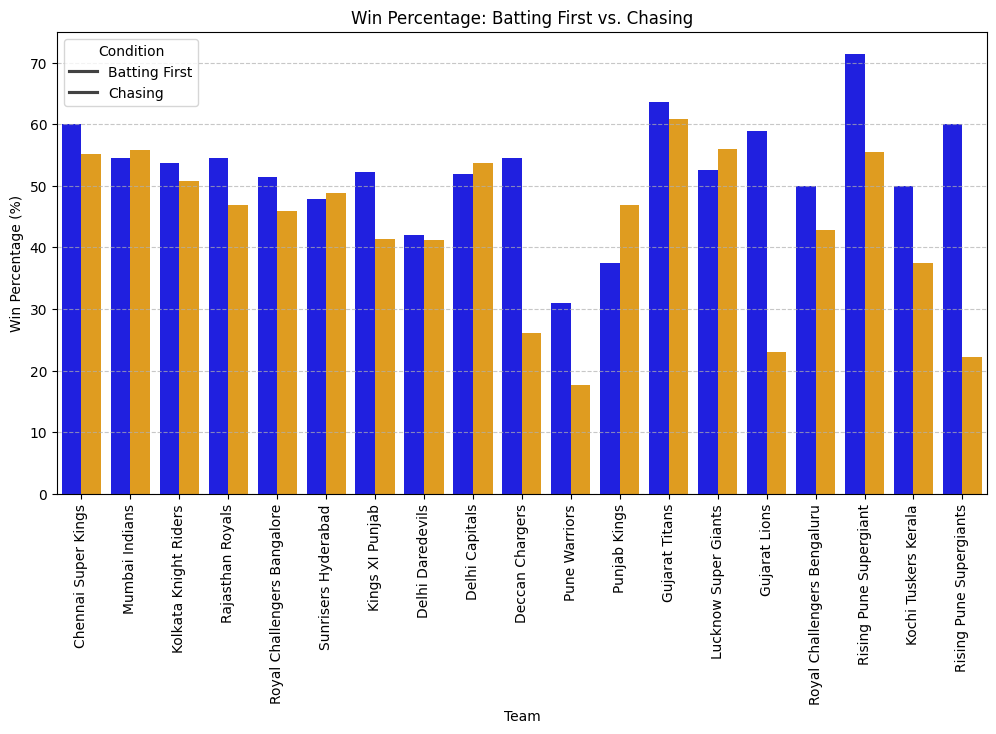

In [28]:
# Rename columns for clarity
matches_df = matches_df.rename(columns={"season": "Season", "winner": "Winner", "team1": "Team1", "team2": "Team2", "toss_winner": "Toss_Winner", "toss_decision": "Toss_Decision"})

# Determine if a team was batting first or chasing
matches_df["Batting_First_Team"] = matches_df.apply(lambda row: row["Team1"] if row["Toss_Decision"] == "bat" else row["Team2"], axis=1)
matches_df["Chasing_Team"] = matches_df.apply(lambda row: row["Team2"] if row["Toss_Decision"] == "bat" else row["Team1"], axis=1)

# Count total matches played while batting first and chasing
batting_first_matches = matches_df["Batting_First_Team"].value_counts().reset_index()
batting_first_matches.columns = ["Team", "Batting_First_Matches"]

chasing_matches = matches_df["Chasing_Team"].value_counts().reset_index()
chasing_matches.columns = ["Team", "Chasing_Matches"]

# Count total wins when batting first and chasing
batting_first_wins = matches_df[matches_df["Winner"] == matches_df["Batting_First_Team"]]["Winner"].value_counts().reset_index()
batting_first_wins.columns = ["Team", "Batting_First_Wins"]

chasing_wins = matches_df[matches_df["Winner"] == matches_df["Chasing_Team"]]["Winner"].value_counts().reset_index()
chasing_wins.columns = ["Team", "Chasing_Wins"]

# Merge data into a single dataframe
team_performance = pd.merge(batting_first_matches, batting_first_wins, on="Team", how="left").fillna(0)
team_performance = pd.merge(team_performance, chasing_matches, on="Team", how="left").fillna(0)
team_performance = pd.merge(team_performance, chasing_wins, on="Team", how="left").fillna(0)

# Calculate win percentages
team_performance["Batting_First_Win_Percentage"] = (team_performance["Batting_First_Wins"] / team_performance["Batting_First_Matches"]) * 100
team_performance["Chasing_Win_Percentage"] = (team_performance["Chasing_Wins"] / team_performance["Chasing_Matches"]) * 100

# Plot performance when batting first vs. chasing
plt.figure(figsize=(12, 6))
team_performance_melted = team_performance.melt(id_vars=["Team"], value_vars=["Batting_First_Win_Percentage", "Chasing_Win_Percentage"],
                                                var_name="Condition", value_name="Win Percentage")

sns.barplot(data=team_performance_melted, x="Team", y="Win Percentage", hue="Condition", palette=["blue", "orange"])
plt.xticks(rotation=90)
plt.title("Win Percentage: Batting First vs. Chasing")
plt.ylabel("Win Percentage (%)")
plt.xlabel("Team")
plt.legend(title="Condition", labels=["Batting First", "Chasing"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


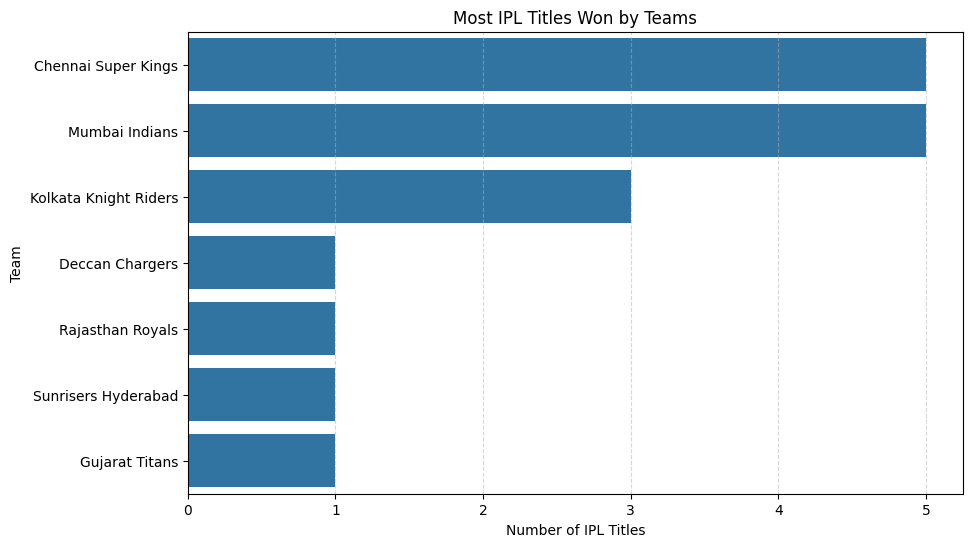

In [29]:
# Rename columns for clarity
matches_df=matches_df.rename(columns={"season": "Season", "winner": "Winner"})

# Identify final matches of each season
final_matches = matches_df.drop_duplicates(subset=["Season"], keep="last")

# Count the number of times each team has won the final match
title_wins = final_matches["Winner"].value_counts().reset_index()
title_wins.columns = ["Team", "Titles_Won"]

# Sort by number of titles
title_wins = title_wins.sort_values(by="Titles_Won", ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=title_wins, x="Titles_Won", y="Team")
plt.xlabel("Number of IPL Titles")
plt.ylabel("Team")
plt.title("Most IPL Titles Won by Teams")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

                   batting_team  total_runs
18          Sunrisers Hyderabad         287
8         Kolkata Knight Riders         272
16  Royal Challengers Bangalore         263
17  Royal Challengers Bengaluru         262
12                 Punjab Kings         262
2                Delhi Capitals         257
9          Lucknow Super Giants         257
10               Mumbai Indians         247
0           Chennai Super Kings         246
5                Gujarat Titans         233
6               Kings XI Punjab         232
3              Delhi Daredevils         231
13             Rajasthan Royals         226
1               Deccan Chargers         214
4                 Gujarat Lions         208
15      Rising Pune Supergiants         195
11                Pune Warriors         192
14       Rising Pune Supergiant         187
7          Kochi Tuskers Kerala         184


<ipython-input-30-0849feb68bf3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_runs", y="batting_team", data=highest_scores, palette="coolwarm")


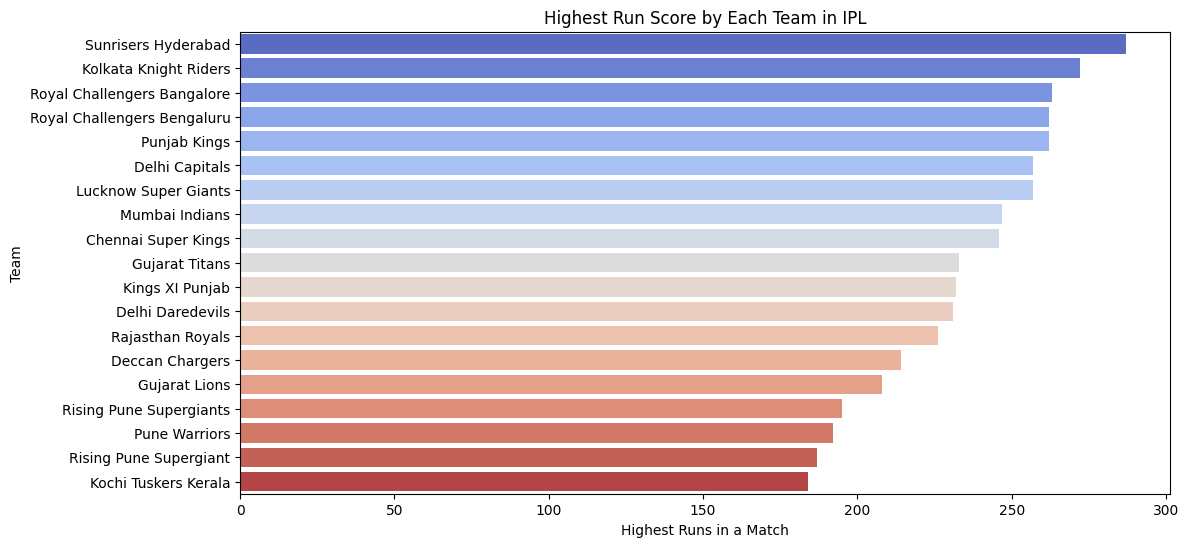

In [30]:
# Aggregate total runs per match for each team
team_scores = deliveries_df.groupby(["match_id", "batting_team"])["total_runs"].sum().reset_index()

# Get highest score by each team
highest_scores = team_scores.groupby("batting_team")["total_runs"].max().reset_index()

# Sort by highest runs
highest_scores = highest_scores.sort_values(by="total_runs", ascending=False)

# Display result
print(highest_scores)

# Plot highest runs scored by each team
plt.figure(figsize=(12, 6))
sns.barplot(x="total_runs", y="batting_team", data=highest_scores, palette="coolwarm")
plt.xlabel("Highest Runs in a Match")
plt.ylabel("Team")
plt.title("Highest Run Score by Each Team in IPL")
plt.show()


                   batting_team  200+ Scores
0           Chennai Super Kings           32
9                Mumbai Indians           25
7         Kolkata Knight Riders           25
12  Royal Challengers Bangalore           24
11             Rajasthan Royals           21
14          Sunrisers Hyderabad           21
6               Kings XI Punjab           15
2                Delhi Capitals           11
10                 Punjab Kings           10
5                Gujarat Titans            8
8          Lucknow Super Giants            7
13  Royal Challengers Bengaluru            6
3              Delhi Daredevils            5
4                 Gujarat Lions            1
1               Deccan Chargers            1


<ipython-input-31-0005191fc08e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="200+ Scores", y="batting_team", data=high_scores_count, palette="viridis")


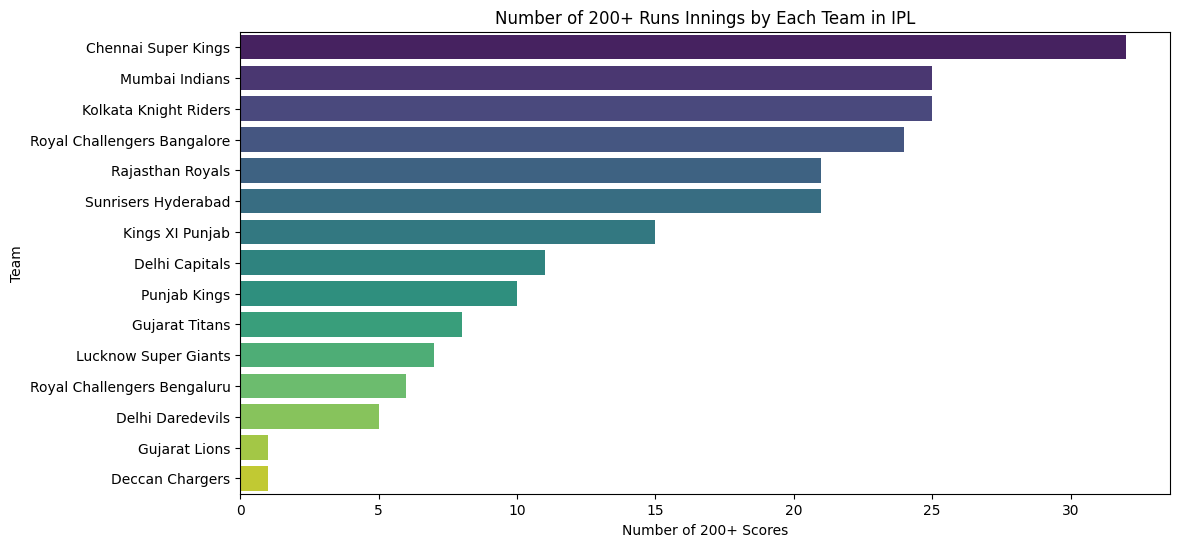

In [31]:
# Aggregate total runs per match for each team
team_scores = deliveries_df.groupby(["match_id", "batting_team"])["total_runs"].sum().reset_index()

# Filter matches where a team scored 200+ runs
high_scores = team_scores[team_scores["total_runs"] >= 200]

# Count the number of 200+ innings per team
high_scores_count = high_scores.groupby("batting_team")["match_id"].count().reset_index()
high_scores_count.rename(columns={"match_id": "200+ Scores"}, inplace=True)

# Sort by number of 200+ scores
high_scores_count = high_scores_count.sort_values(by="200+ Scores", ascending=False)

# Display result
print(high_scores_count)

# Plot the number of 200+ innings by each team
plt.figure(figsize=(12, 6))
sns.barplot(x="200+ Scores", y="batting_team", data=high_scores_count, palette="viridis")
plt.xlabel("Number of 200+ Scores")
plt.ylabel("Team")
plt.title("Number of 200+ Runs Innings by Each Team in IPL")
plt.show()


In [32]:
# Load CSV while handling errors
try:
    deliveries_df = pd.read_csv("deliveries.csv", on_bad_lines="skip", delimiter=",", quoting=3)
except Exception as e:
    print("Error loading CSV:", e)
    exit()

# Display first few rows to check the structure
print(deliveries_df.head())

# Ensure 'over' column is numeric
deliveries_df['over'] = pd.to_numeric(deliveries_df['over'], errors='coerce')

# Drop rows where 'over' couldn't be converted
deliveries_df = deliveries_df.dropna(subset=['over'])

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

                   batting_team  total_runs
10               Mumbai Indians        9598
0           Chennai Super Kings        9061
16  Royal Challengers Bangalore        8417
8         Kolkata Knight Riders        8053
13             Rajasthan Royals        7281
18          Sunrisers Hyderabad        6237
6               Kings XI Punjab        6227
3              Delhi Daredevils        5043
2                Delhi Capitals        3141
1               Deccan Chargers        2539
12                 Punjab Kings        2047
5                Gujarat Titans        1823
9          Lucknow Super Giants        1718
11                Pune Warriors        1360
4                 Gujarat Lions         921
17  Royal Challengers Bengaluru         611
14       Rising Pune Supergiant         555
15      Rising Pune Supergiants         443
7          Kochi Tuskers Kerala         337


<ipython-input-33-66128583c2a6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=death_over_runs, x="total_runs", y="batting_team", palette="coolwarm")


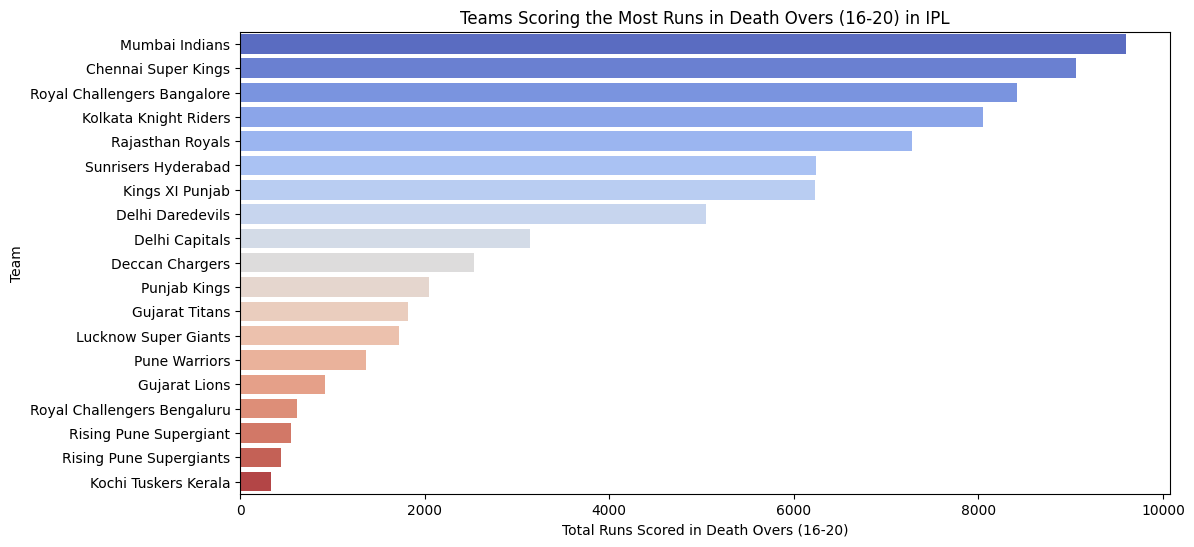

In [33]:
# Filter deliveries from overs 16-20
death_overs = deliveries_df[(deliveries_df["over"] >= 16) & (deliveries_df["over"] <= 20)]

# Group by team and sum runs
death_over_runs = death_overs.groupby("batting_team")["total_runs"].sum().reset_index()

# Sort in descending order
death_over_runs = death_over_runs.sort_values(by="total_runs", ascending=False)

# Display top teams
print(death_over_runs)

# Set figure size
plt.figure(figsize=(12,6))

# Plot bar chart
sns.barplot(data=death_over_runs, x="total_runs", y="batting_team", palette="coolwarm")

# Labels and title
plt.xlabel("Total Runs Scored in Death Overs (16-20)")
plt.ylabel("Team")
plt.title("Teams Scoring the Most Runs in Death Overs (16-20) in IPL")

# Show plot
plt.show()


# **PLAYER STATISTICS AND RANKINGS**

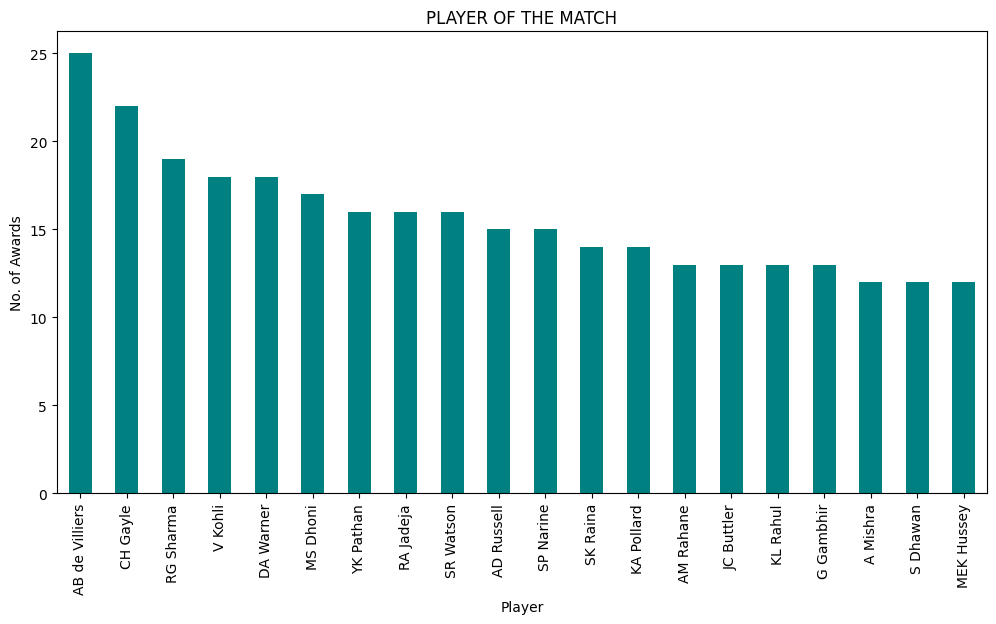

In [34]:
matches_df['player_of_match'].value_counts().head(20).plot.bar(figsize=(12, 6), color = 'teal')
plt.title("PLAYER OF THE MATCH",size=12)
plt.ylabel("No. of Awards",size=10)
plt.xlabel("Player",size=10)
plt.show()

           batter  total_runs
0         V Kohli        8014
1        S Dhawan        6769
2       RG Sharma        6630
3       DA Warner        6567
4        SK Raina        5536
5        MS Dhoni        5243
6  AB de Villiers        5181
7        CH Gayle        4997
8      RV Uthappa        4954
9      KD Karthik        4843


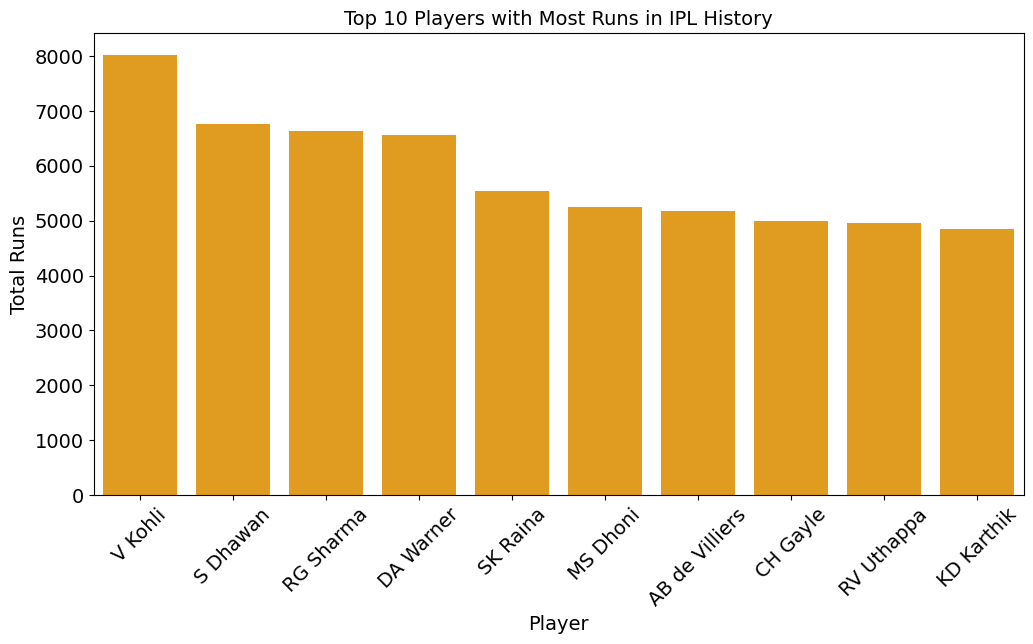

In [35]:
player_runs = deliveries_df[['batter', 'batsman_runs']]
player_runs = player_runs.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')

# Sorting the players by total runs
top_players = player_runs.sort_values(by='total_runs', ascending=False).head(10)

print(top_players.reset_index(drop=True))

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_players, x='batter', y='total_runs',color = 'orange')

# # Adding titles and labels
plt.title('Top 10 Players with Most Runs in IPL History', fontsize=14)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

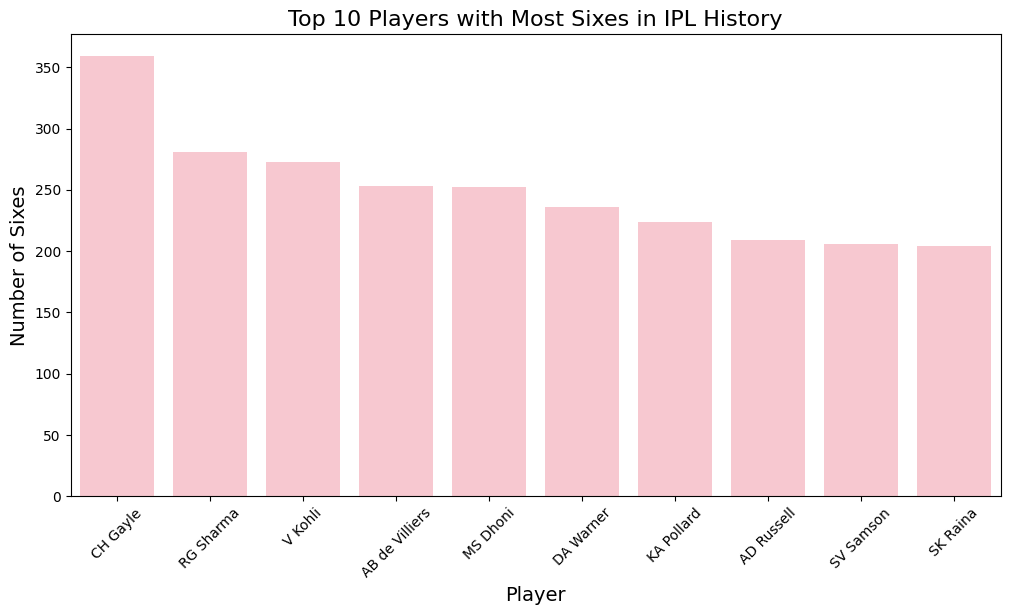

In [36]:
most_sixes = deliveries_df[deliveries_df['batsman_runs'] == 6]['batter'].value_counts().head(10)
most_sixes_df = most_sixes.reset_index()
most_sixes_df.columns = ['batter', 'sixes']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_sixes_df, x='batter', y='sixes',color = 'pink')

# Adding titles and labels
plt.title('Top 10 Players with Most Sixes in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Sixes', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<ipython-input-37-a82a2c53a570>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=most_fours_df, x='batter', y='sixes',palette = 'twilight')


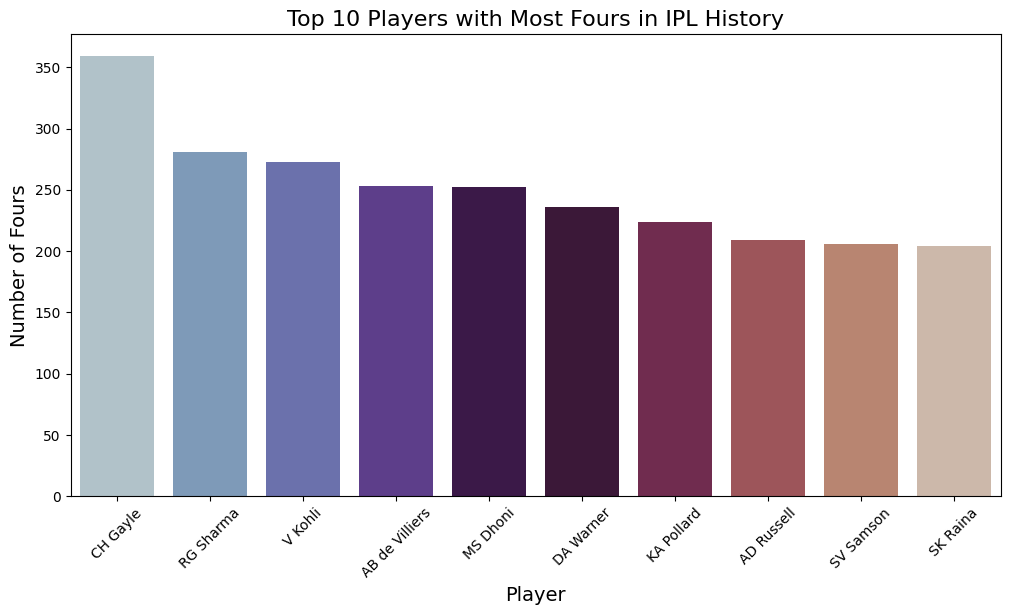

In [37]:
most_fours = deliveries_df[deliveries_df['batsman_runs'] == 4]['batter'].value_counts().head(10)
most_fours_df = most_sixes.reset_index()
most_fours_df.columns = ['batter', 'sixes']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_fours_df, x='batter', y='sixes',palette = 'twilight')

# Adding titles and labels
plt.title('Top 10 Players with Most Fours in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Fours', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<ipython-input-38-c7f846834f2b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=most_threes_df, x='batter', y='sixes',palette = 'spring')


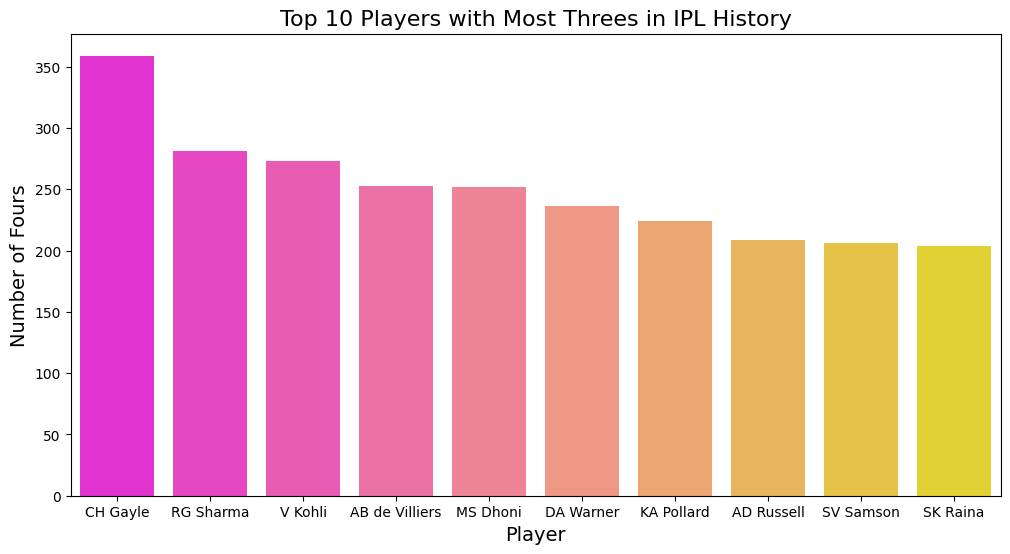

In [38]:
most_threes = deliveries_df[deliveries_df['batsman_runs'] == 4]['batter'].value_counts().head(10)
most_threes_df = most_sixes.reset_index()
most_threes_df.columns = ['batter', 'sixes']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_threes_df, x='batter', y='sixes',palette = 'spring')

# Adding titles and labels
plt.title('Top 10 Players with Most Threes in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Fours', fontsize=14)

plt.show()


Top 10 Batsmen with Highest Strike Rate:
                total_runs  balls_faced  strike_rate
batter                                              
PD Salt                653          385   169.610390
T Stubbs               405          239   169.456067
TM Head                772          458   168.558952
AD Russell            2488         1515   164.224422
H Klaasen              993          613   161.990212
TH David               659          417   158.033573
SP Narine             1534          984   155.894309
Shashank Singh         423          272   155.514706
N Pooran              1769         1143   154.768154
LS Livingstone         939          609   154.187192


<ipython-input-39-8c15c31a45ea>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=top_batsmen, x='batter', y='strike_rate', palette='PiYG')


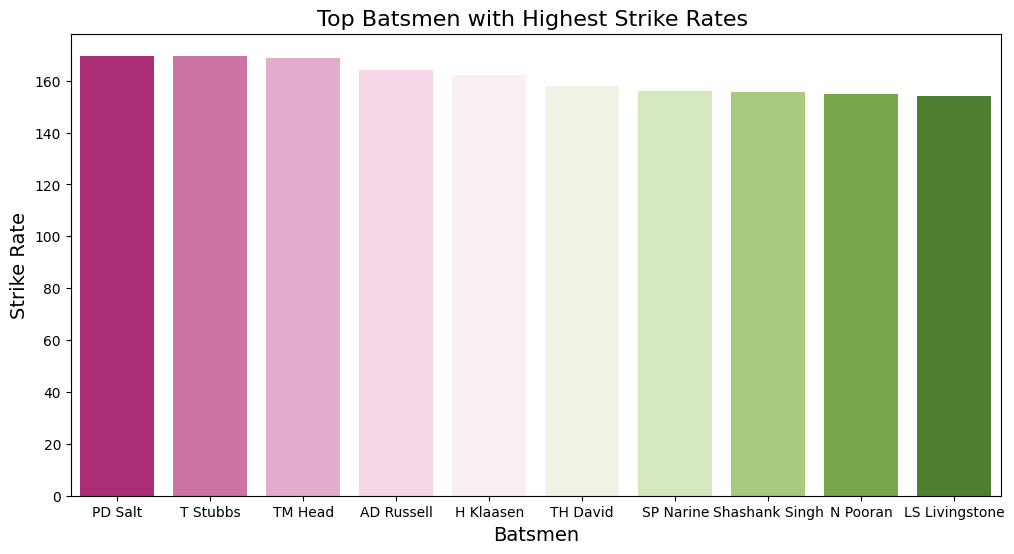

In [39]:
batsman_stats = deliveries_df.groupby("batter").agg(total_runs=("batsman_runs", "sum"), balls_faced=("ball", "count"))

batsman_stats["strike_rate"] = (batsman_stats["total_runs"] / batsman_stats["balls_faced"]) * 100

# (minimum 200 balls faced for reliability)
top_batsmen = batsman_stats[batsman_stats["balls_faced"] >= 200].nlargest(10, "strike_rate")

print("\nTop 10 Batsmen with Highest Strike Rate:")
print(top_batsmen)

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_batsmen, x='batter', y='strike_rate', palette='PiYG')

# Adding titles and labels
plt.title('Top Batsmen with Highest Strike Rates ', fontsize=16)
plt.xlabel('Batsmen', fontsize=14)
plt.ylabel('Strike Rate', fontsize=14)
plt.show()

       bowler  total_wicket
0   YS Chahal           213
1    DJ Bravo           207
2   PP Chawla           201
3   SP Narine           200
4    R Ashwin           198
5     B Kumar           195
6  SL Malinga           188
7    A Mishra           183
8   JJ Bumrah           182
9   RA Jadeja           169


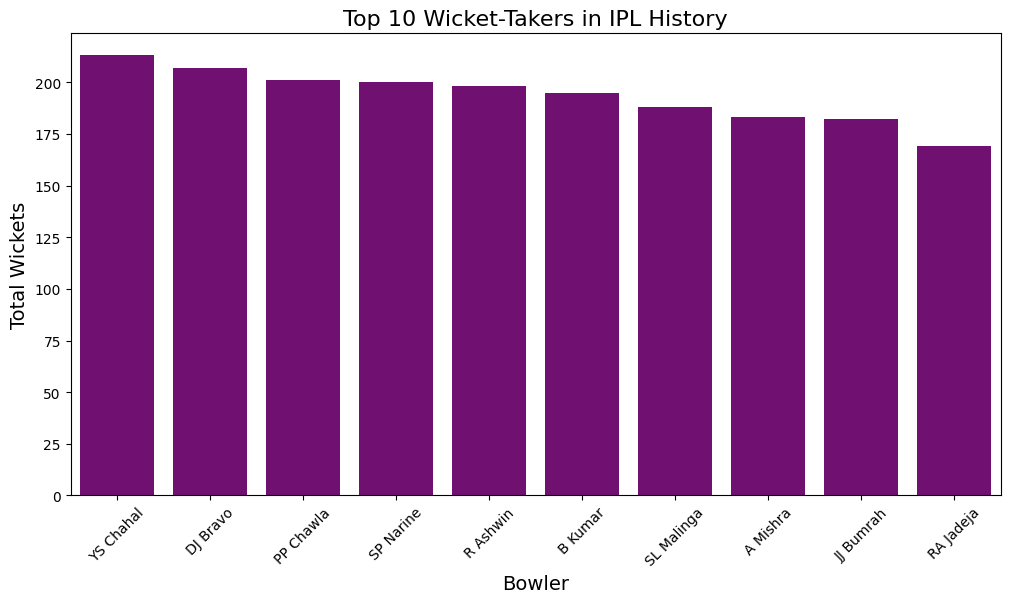

In [40]:
most_wicket_taker = deliveries_df[['bowler', 'is_wicket']]
most_wicket_taker = most_wicket_taker.groupby('bowler')['is_wicket'].sum().reset_index(name='total_wicket')
most_wicket_taker = most_wicket_taker.sort_values(by='total_wicket', ascending=False).reset_index(drop=True)

#top 10 wicket-takers
top_wicket_takers = most_wicket_taker.head(10)
print(top_wicket_takers)

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_wicket_takers, x='bowler', y='total_wicket', color='purple')

# Adding titles and labels
plt.title('Top 10 Wicket-Takers in IPL History', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [41]:
runs_conceded = deliveries_df.groupby('bowler')['batsman_runs'].sum().reset_index(name='runs_conceded')
valid_deliveries = deliveries_df[~deliveries_df['extras_type'].isin(['wides', 'noballs'])]

# Counting the number of balls bowled for valid deliveries
balls_bowled = valid_deliveries.groupby('bowler')['ball'].count().reset_index(name='balls_bowled')
balls_bowled['overs_bowled'] = balls_bowled['balls_bowled'] / 6

#Merging runs conceded and balls bowled data
bowler_stats = pd.merge(runs_conceded, balls_bowled[['bowler', 'overs_bowled']], on='bowler', how='left')

#Calculating the economy rate
bowler_stats['economy_rate'] = bowler_stats['runs_conceded'] / bowler_stats['overs_bowled']

#Sorting the bowlers by economy rate
most_economical_bowlers = bowler_stats.sort_values(by='economy_rate').reset_index(drop=True)

# Displaying the top bowlers with lowest economy rates
top_15_most_economical_bowlers = most_economical_bowlers.head(15)

# Display the result
print(top_15_most_economical_bowlers)

             bowler  runs_conceded  overs_bowled  economy_rate
0      AC Gilchrist              0      0.166667      0.000000
1        R Ravindra              7      2.000000      3.500000
2          NB Singh             14      4.000000      3.500000
3       Sachin Baby              8      1.666667      4.800000
4         SS Mundhe              5      1.000000      5.000000
5     LA Carseldine              5      1.000000      5.000000
6         AM Rahane              5      1.000000      5.000000
7       DJ Thornely             38      7.000000      5.428571
8     Sohail Tanvir            246     41.166667      5.975709
9          MW Short             24      4.000000      6.000000
10        DA Warner              1      0.166667      6.000000
11         M Manhas             42      7.000000      6.000000
12        MJ Clarke             67     11.000000      6.090909
13  Mohammad Hafeez             61     10.000000      6.100000
14       SM Harwood             61     10.000000      6

<ipython-input-42-03db3cebe67b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=top_15_most_economical_bowlers, x='economy_rate', y='bowler', palette='PiYG')


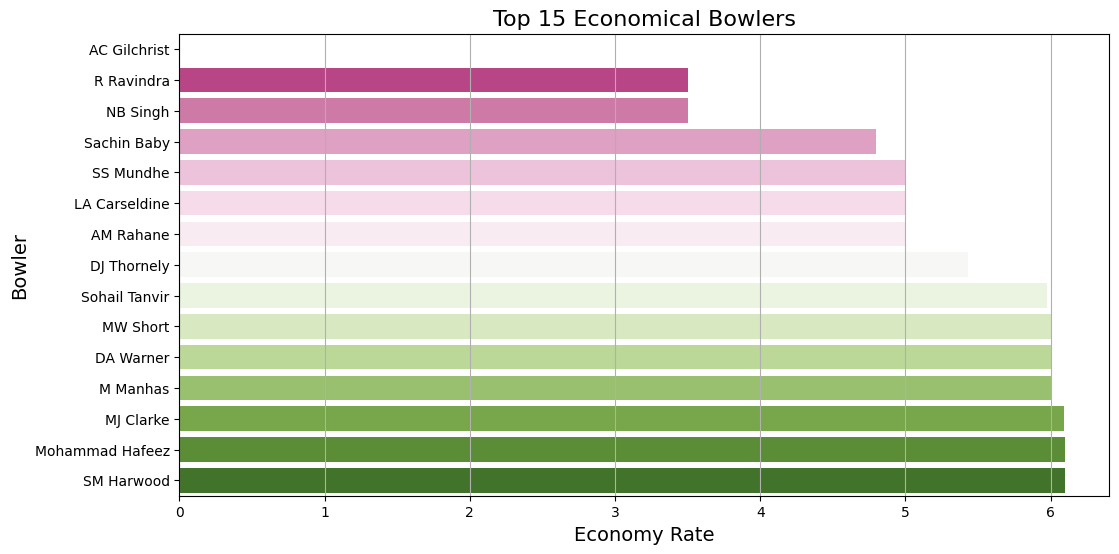

In [42]:
# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_15_most_economical_bowlers, x='economy_rate', y='bowler', palette='PiYG')

# Adding titles and labels
plt.title('Top 15 Economical Bowlers', fontsize=16)
plt.xlabel('Economy Rate', fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.grid(axis='x')
plt.show()


In [43]:
most_expensive_bowlers= bowler_stats.sort_values(by='economy_rate', ascending=False).head(10).reset_index(drop=True)
most_expensive_bowlers

bowler  runs_conceded  overs_bowled  economy_rate
0    YBK Jaiswal              6      0.166667     36.000000
1  Atharva Taide              4      0.166667     24.000000
2     I Malhotra             23      1.000000     23.000000
3      LPC Silva             21      1.000000     21.000000
4       B Chipli             20      1.000000     20.000000
5        SN Khan              6      0.333333     18.000000
6     P Prasanth             18      1.000000     18.000000
7     RR Bhatkal             35      2.000000     17.500000
8  CK Kapugedera             49      2.833333     17.294118
9       S Sriram             49      3.000000     16.333333

<ipython-input-44-9bc93a6f0624>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=most_expensive_bowlers, x='economy_rate', y='bowler', palette='brg')


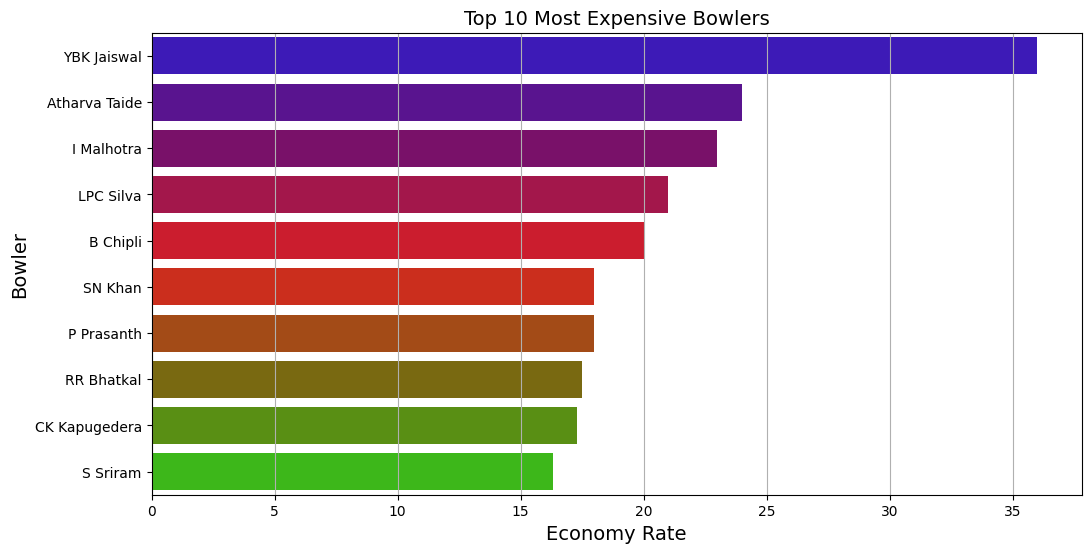

In [44]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_expensive_bowlers, x='economy_rate', y='bowler', palette='brg')
plt.title('Top 10 Most Expensive Bowlers',fontsize=14)
plt.xlabel('Economy Rate',fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.grid(axis='x')
plt.show()

In [45]:
# Filtering the data for deliveries where a wicket was taken
dismissals = deliveries_df[deliveries_df['is_wicket'] == 1]

# Grouping by dismissal type and count the number of each type
dismissal_counts = dismissals.groupby('dismissal_kind')['is_wicket'].count().reset_index(name='count')

# Sorting the dismissal types by their count in descending order
dismissal_counts = dismissal_counts.sort_values(by='count', ascending=False)
dismissal_counts

dismissal_kind  count
1                 caught   8063
0                 bowled   2212
8                run out   1114
4                    lbw    800
2      caught and bowled    367
9                stumped    358
6           retired hurt     15
3             hit wicket     15
5  obstructing the field      3
7            retired out      3

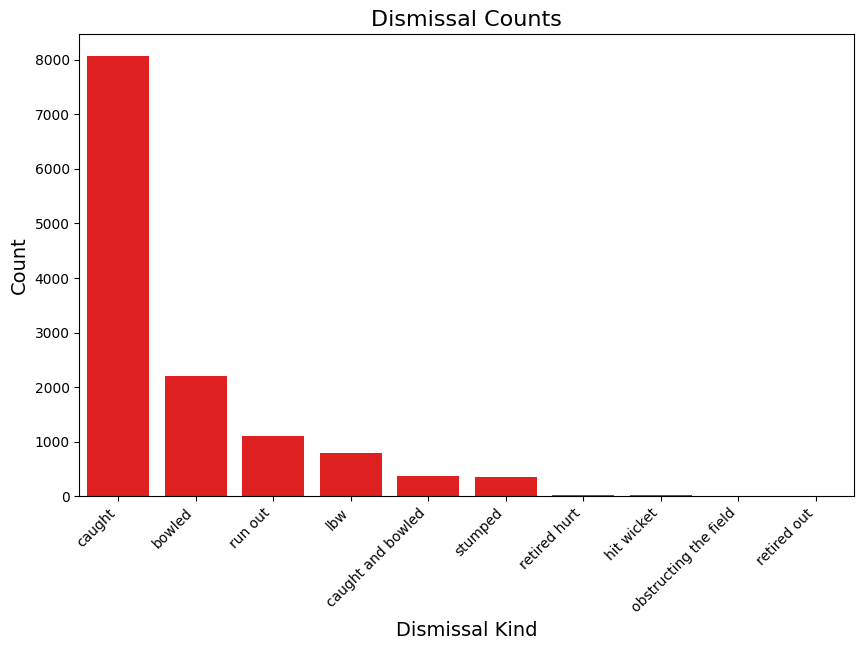

In [46]:
# Plotting the dismissal counts
plt.figure(figsize=(10, 6))
sns.countplot(x='dismissal_kind', data=dismissals, order=dismissals['dismissal_kind'].value_counts().index,color = 'red')
plt.title('Dismissal Counts', fontsize=16)
plt.xlabel('Dismissal Kind', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


# **VENUE AND TOSS IMPACT STUDY**

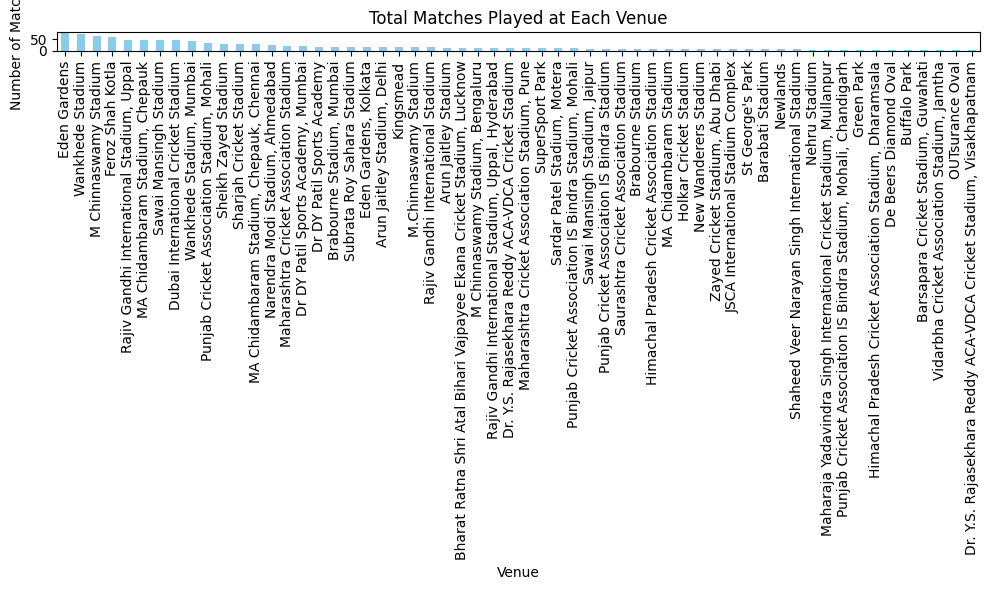

In [47]:
# Visualization 1: Total Matches Played at Each Venue
venue_counts = matches_df['venue'].value_counts()
plt.figure(figsize=(10, 6))
venue_counts.plot(kind='bar', color='skyblue')
plt.title('Total Matches Played at Each Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

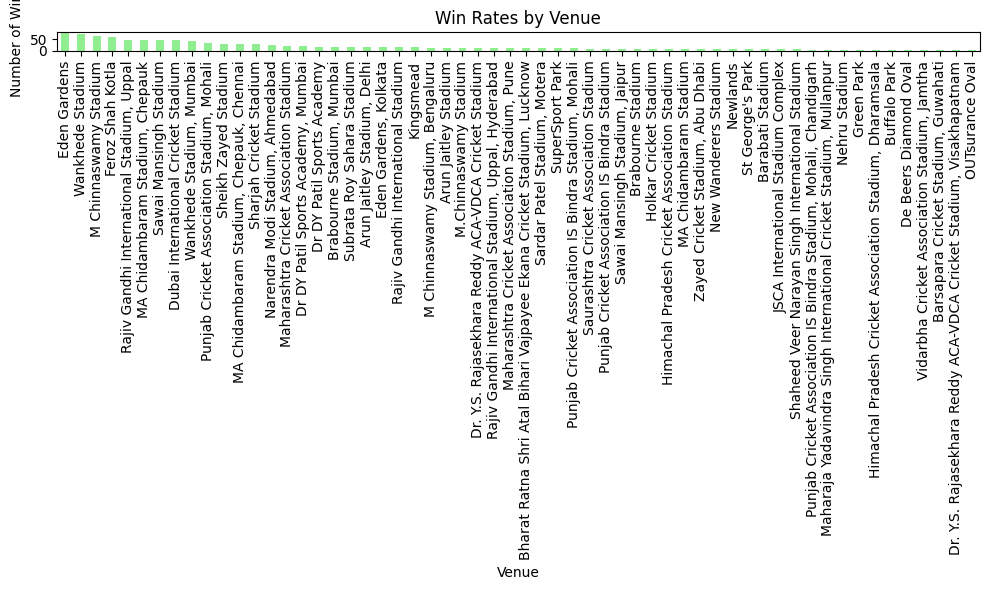

In [51]:
# Visualization 2: Win Rates by Venue
matches_df = matches_df.dropna(subset=['venue', 'Toss_Decision', 'Winner'])  # Use 'Toss_Decision' and 'Winner'
venue_winners = matches_df.groupby('venue')['Winner'].count()  # Use 'Winner'
plt.figure(figsize=(10, 6))
venue_winners.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Win Rates by Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

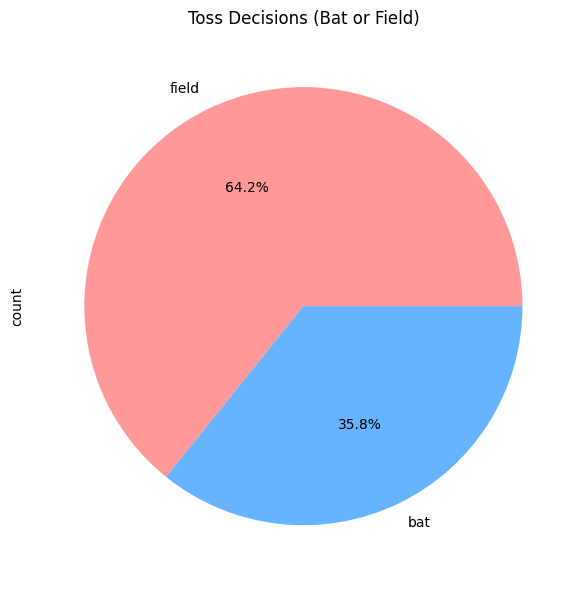

In [53]:
# Visualization 3: Toss Decisions (Bat/Field) Across Matches
toss_decisions = matches_df['Toss_Decision'].value_counts() # Changed 'toss_decision' to 'Toss_Decision'
plt.figure(figsize=(6, 6))
toss_decisions.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], labels=toss_decisions.index)
plt.title('Toss Decisions (Bat or Field)')
plt.tight_layout()
plt.show()

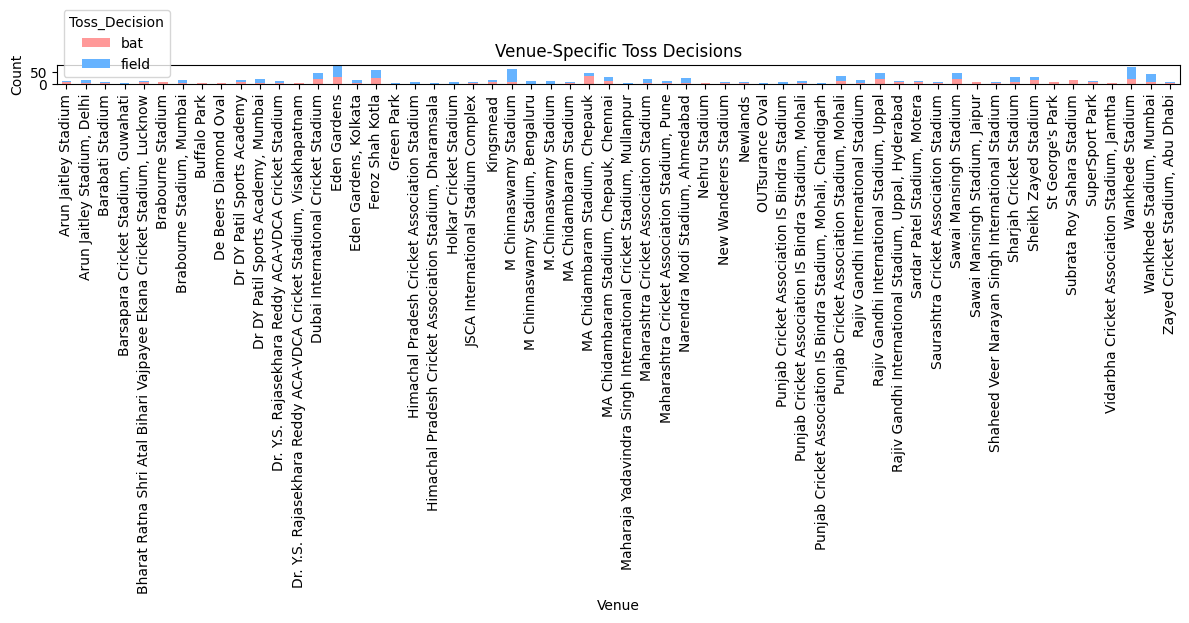

In [55]:
# Visualization 4: Venue-Specific Toss Decisions
venue_toss = matches_df.groupby(['venue', 'Toss_Decision']).size().unstack()  # Changed 'toss_decision' to 'Toss_Decision'
venue_toss.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#ff9999','#66b3ff'])
plt.title('Venue-Specific Toss Decisions')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

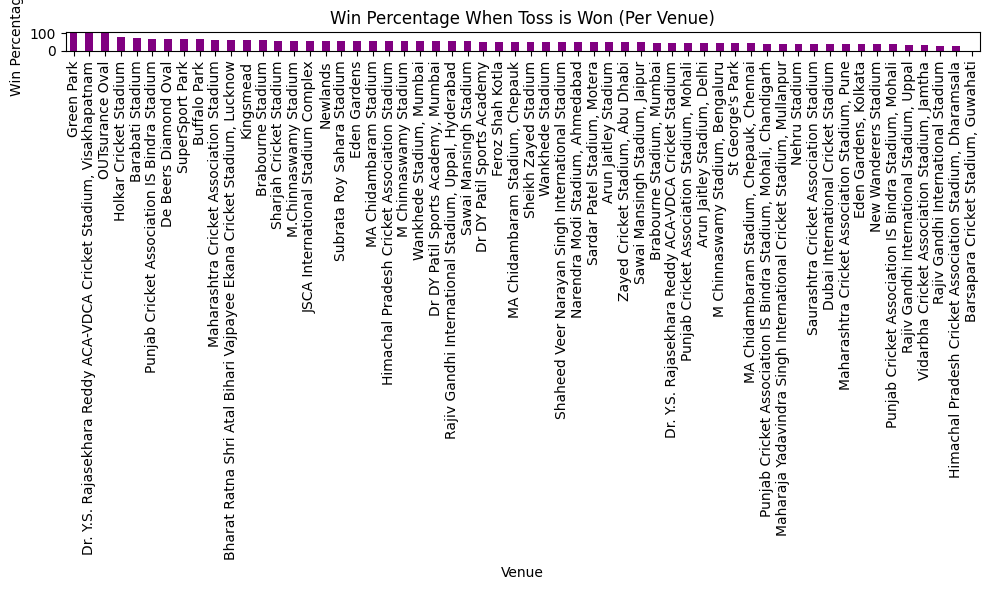

In [57]:
# Visualization 5: Win Percentage When Toss is Won
matches_df['toss_win_and_match_win'] = matches_df['Toss_Winner'] == matches_df['Winner']  # Assuming 'Toss_Winner' and 'Winner' are the correct column names
toss_effect = matches_df.groupby('venue')['toss_win_and_match_win'].mean() * 100
plt.figure(figsize=(10, 6))
toss_effect.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Win Percentage When Toss is Won (Per Venue)')
plt.xlabel('Venue')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

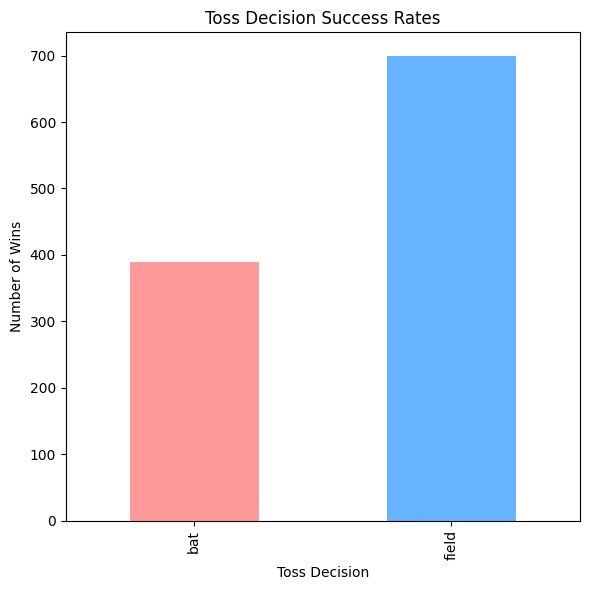

In [59]:
# Visualization 6: Toss Decision Success Rate
toss_decision_winner = matches_df.groupby('Toss_Decision')['Winner'].count() # Changed 'toss_decision' to 'Toss_Decision'
plt.figure(figsize=(6, 6))
toss_decision_winner.plot(kind='bar', color=['#ff9999','#66b3ff'])
plt.title('Toss Decision Success Rates')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Wins')
plt.tight_layout()
plt.show()

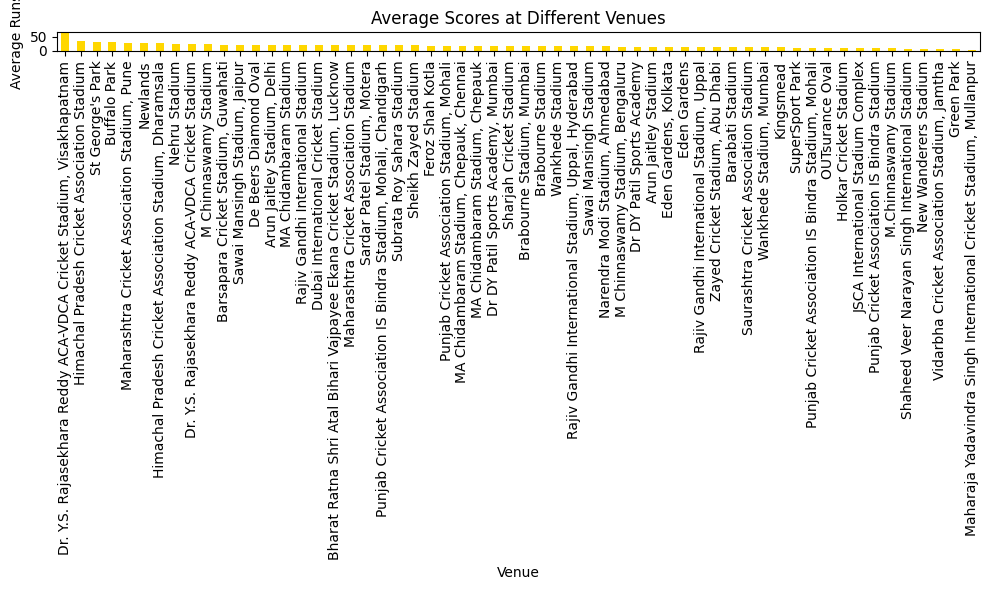

In [61]:
# Visualization 7: Average Scores at Different Venues
matches_df['total_runs'] = matches_df['result_margin']  # Ensure correct calculations (Optional Improvement)
average_scores = matches_df.groupby('venue')['total_runs'].mean()
plt.figure(figsize=(10, 6))
average_scores.sort_values(ascending=False).plot(kind='bar', color='gold')
plt.title('Average Scores at Different Venues')
plt.xlabel('Venue')
plt.ylabel('Average Runs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

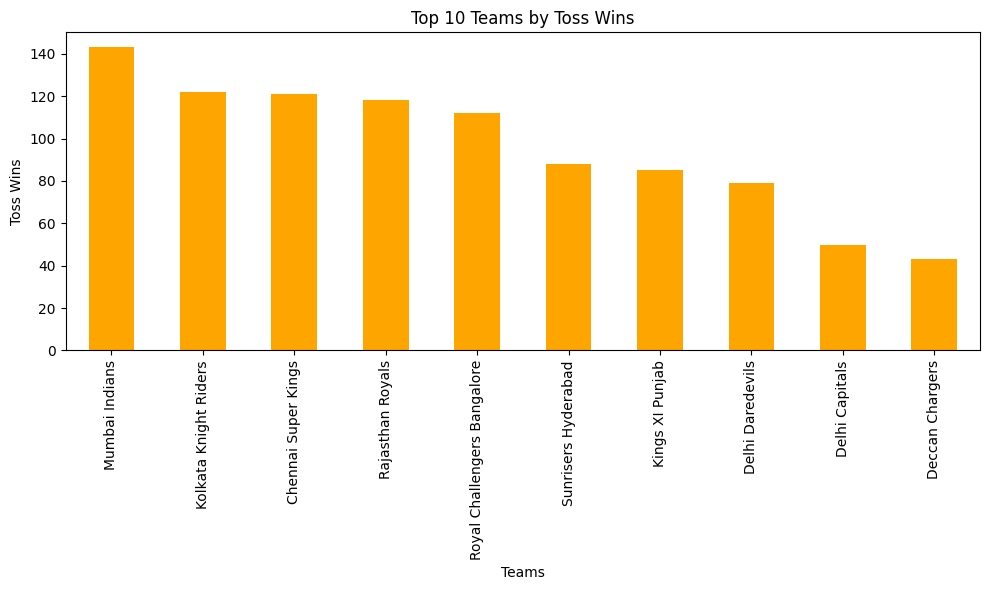

In [63]:
# Visualization 8: Top 10 Teams by Toss Wins
team_toss_wins = matches_df['Toss_Winner'].value_counts().head(10) # Changed 'toss_winner' to 'Toss_Winner'
plt.figure(figsize=(10, 6))
team_toss_wins.plot(kind='bar', color='orange')
plt.title('Top 10 Teams by Toss Wins')
plt.xlabel('Teams')
plt.ylabel('Toss Wins')
plt.tight_layout()
plt.show()

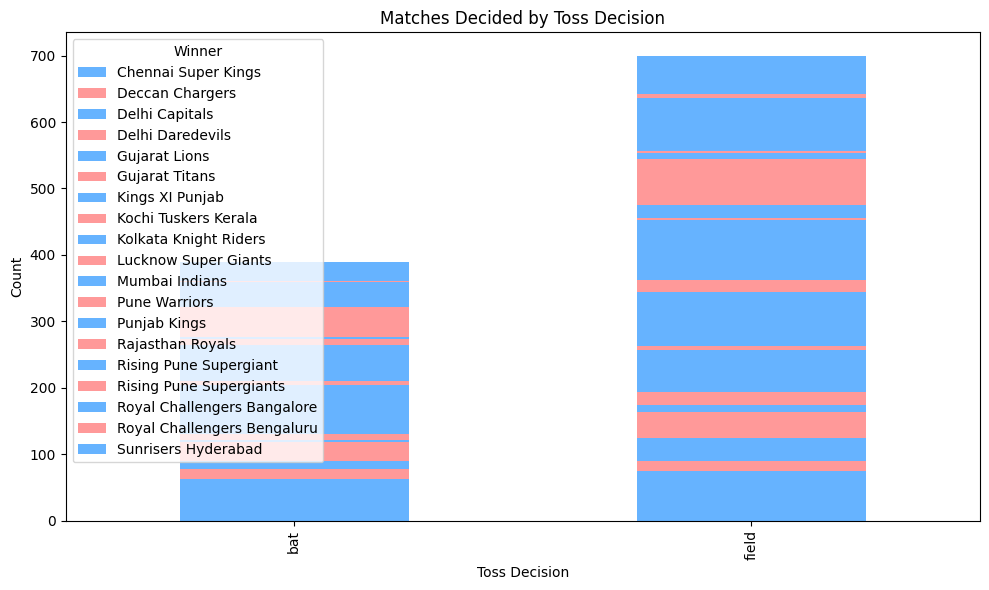

In [65]:
# Visualization 9: Matches Decided by Toss Decision
toss_and_results = matches_df.groupby(['Toss_Decision', 'Winner']).size().unstack()  # Changed 'toss_decision' to 'Toss_Decision'
toss_and_results.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ff9999'])
plt.title('Matches Decided by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

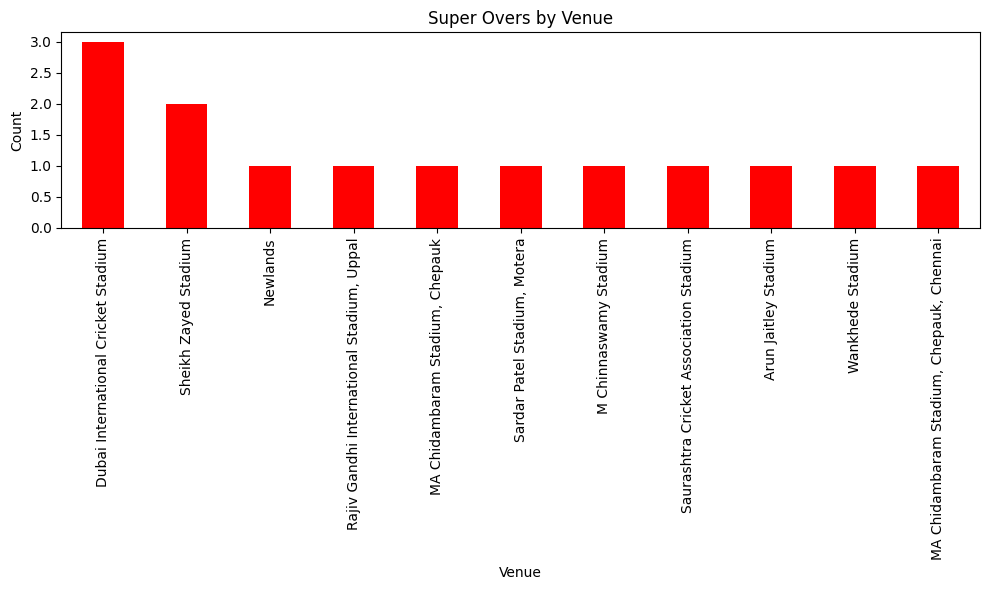

In [66]:
# Visualization 10: Super Overs at Different Venues
super_overs = matches_df[matches_df['super_over'] == 'Y']['venue'].value_counts()
plt.figure(figsize=(10, 6))
super_overs.plot(kind='bar', color='red')
plt.title('Super Overs by Venue')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ***HEAD TO HEAD COMPARISONE***

In [67]:
matches_df['venue'].value_counts()

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    63
Feroz Shah Kotla                                                         59
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narendra Modi Stadium, Ahmedabad                                         24
Maharashtra Cricket Association Stadium                                  22
Dr DY Patil Sports Academy, Mumbai                                       20
Dr DY Patil Sports Academy                                               17
Brabourne Stadium, Mumbai                                                17
Subrata Roy Sahara Stadium                                               16
Eden Gardens, Kolkata                                                    16
Arun Jaitley Stadium, Delhi                                              16
Kingsmead                                                                15
Rajiv Gandhi International Stadium                                       15
M Chinnaswamy Stadium, Bengaluru                                         14
M.Chinnaswamy Stadium                                                    14
Arun Jaitley Stadium                                                     14
Rajiv Gandhi International Stadium, Uppal, Hyderabad                     13
Maharashtra Cricket Association Stadium, Pune                            13
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium                      13
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow    13
SuperSport Park                                                          12
Sardar Patel Stadium, Motera                                             12
Punjab Cricket Association IS Bindra Stadium, Mohali                     11
Sawai Mansingh Stadium, Jaipur                                           10
Punjab Cricket Association IS Bindra Stadium                             10
Saurashtra Cricket Association Stadium                                   10
Brabourne Stadium                                                        10
Himachal Pradesh Cricket Association Stadium                              9
MA Chidambaram Stadium                                                    9
Holkar Cricket Stadium                                                    9
New Wanderers Stadium                                                     8
Zayed Cricket Stadium, Abu Dhabi                                          8
JSCA International Stadium Complex                                        7
St George's Park                                                          7
Barabati Stadium                                                          7
Newlands                                                                  7
Shaheed Veer Narayan Singh International Stadium                          6
Nehru Stadium                                                             5
Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur        5
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh          5
Green Park                                                                4
Himachal Pradesh Cricket Association Stadium, Dharamsala                  4
De Beers Diamond Oval                     

In [69]:
matches_df['Winner'].value_counts() # Changed 'winner' to 'Winner'

Winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Sunrisers Hyderabad             88
Kings XI Punjab                 88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [71]:
Teams = list(set(list(matches_df['Team1']) + list(matches_df['Team2'])))  # Changed 'team1' to 'Team1' and 'team2' to 'Team2'
len(Teams)
print(Teams)

['Rising Pune Supergiants', 'Mumbai Indians', 'Chennai Super Kings', 'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Punjab Kings', 'Kochi Tuskers Kerala', 'Kings XI Punjab', 'Rising Pune Supergiant', 'Gujarat Titans', 'Deccan Chargers', 'Kolkata Knight Riders', 'Pune Warriors', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Delhi Capitals', 'Rajasthan Royals', 'Gujarat Lions', 'Royal Challengers Bengaluru']


In [72]:
merged_df = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='id')

In [73]:
unique_stadiums = matches_df['venue'].unique()
print(unique_stadiums)



['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'


In [76]:
# Define the stadium_mapping dictionary with the mappings you want
stadium_mapping = {
    'M Chinnaswamy Stadium': 'Bangalore', #Add more mappings
    'Eden Gardens': 'Kolkata',
    'Wankhede Stadium': 'Mumbai'
}

# Now apply the mapping:
matches_df['venue'] = matches_df['venue'].map(lambda x: stadium_mapping.get(x, x))

In [78]:
Teams = list(set(list(matches_df['Team1']) + list(matches_df['Team2'])))  # Use 'Team1' and 'Team2' instead of 'team1' and 'team2'
len(Teams)
print(Teams)

['Rising Pune Supergiants', 'Mumbai Indians', 'Chennai Super Kings', 'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Punjab Kings', 'Kochi Tuskers Kerala', 'Kings XI Punjab', 'Rising Pune Supergiant', 'Gujarat Titans', 'Deccan Chargers', 'Kolkata Knight Riders', 'Pune Warriors', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Delhi Capitals', 'Rajasthan Royals', 'Gujarat Lions', 'Royal Challengers Bengaluru']


In [83]:
team_mapping = {
    "Kings XI Punjab": "Punjab Kings",
    "Delhi Daredevils": "Delhi Capitals",
    'Royal Challengers Bangalore':'Royal Challengers Bengaluru',
    'Deccan Chargers':'Sunrisers Hyderabad'
    }
# Use 'Team1' instead of 'team1' for consistency with matches_df
merged_df['Team1'] = merged_df['Team1'].replace(team_mapping)
merged_df['Team2'] = merged_df['Team2'].replace(team_mapping)
# Replacing 'winner' with 'Winner' to match the column name
merged_df['Winner'] = merged_df['Winner'].replace(team_mapping)
# Replacing 'toss_winner' with 'Toss_Winner' to match the column name in matches_df
merged_df['Toss_Winner'] = merged_df['Toss_Winner'].replace(team_mapping) # Changed 'toss_winner' to 'Toss_Winner'

#If you have head_to_head data frame then uncomment below 2 lines
#head_to_head['batting_team'] = head_to_head['batting_team'].replace(team_mapping)
#head_to_head['bowling_team'] = head_to_head['bowling_team'].replace(team_mapping)

In [85]:
Teams = list(set(list(merged_df['Team1']) + list(merged_df['Team2']))) # Changed 'team1' and 'team2' to 'Team1' and 'Team2' to match the DataFrame columns
len(Teams)
print(Teams)

['Kochi Tuskers Kerala', 'Rising Pune Supergiants', 'Kolkata Knight Riders', 'Mumbai Indians', 'Chennai Super Kings', 'Rising Pune Supergiant', 'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Gujarat Titans', 'Pune Warriors', 'Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals', 'Rajasthan Royals', 'Gujarat Lions']


In [88]:
# Select two teams for head-to-head analysis (Replace with desired teams)
team1 = 'Chennai Super Kings'
team2 = 'Mumbai Indians'

# Filter merged_df to create head_to_head DataFrame
head_to_head = merged_df[
    ((merged_df['Team1'] == team1) & (merged_df['Team2'] == team2)) |  # Matches where team1 and team2 played
    ((merged_df['Team1'] == team2) & (merged_df['Team2'] == team1))  # Matches where team2 and team1 played
]

total_matches = head_to_head['id'].nunique()
# Changed 'winner' to 'Winner' to match the column name
wins_team1 = head_to_head[head_to_head['Winner'] == team1]['id'].nunique()
# Changed 'winner' to 'Winner' to match the column name
wins_team2 = head_to_head[head_to_head['Winner'] == team2]['id'].nunique()
win_percentage_team1 = (wins_team1 / total_matches) * 100
win_percentage_team2 = (wins_team2 / total_matches) * 100
print(f"Total Matches: {total_matches}")
print(f"{team1} Wins: {wins_team1} ({win_percentage_team1:.2f}%)")
print(f"{team2} Wins: {wins_team2} ({win_percentage_team2:.2f}%)")
# Changed 'toss_winner' to 'Toss_Winner' to match the column name
toss_wins_team1 = head_to_head[head_to_head['Toss_Winner'] == team1]['id'].nunique()
# Changed 'toss_winner' to 'Toss_Winner' to match the column name
toss_wins_team2 = head_to_head[head_to_head['Toss_Winner'] == team2]['id'].nunique()
print(f"Toss Wins for {team1}: {toss_wins_team1}")
print(f"Toss Wins for {team2}: {toss_wins_team2}")

Total Matches: 37
Chennai Super Kings Wins: 17 (45.95%)
Mumbai Indians Wins: 20 (54.05%)
Toss Wins for Chennai Super Kings: 18
Toss Wins for Mumbai Indians: 19


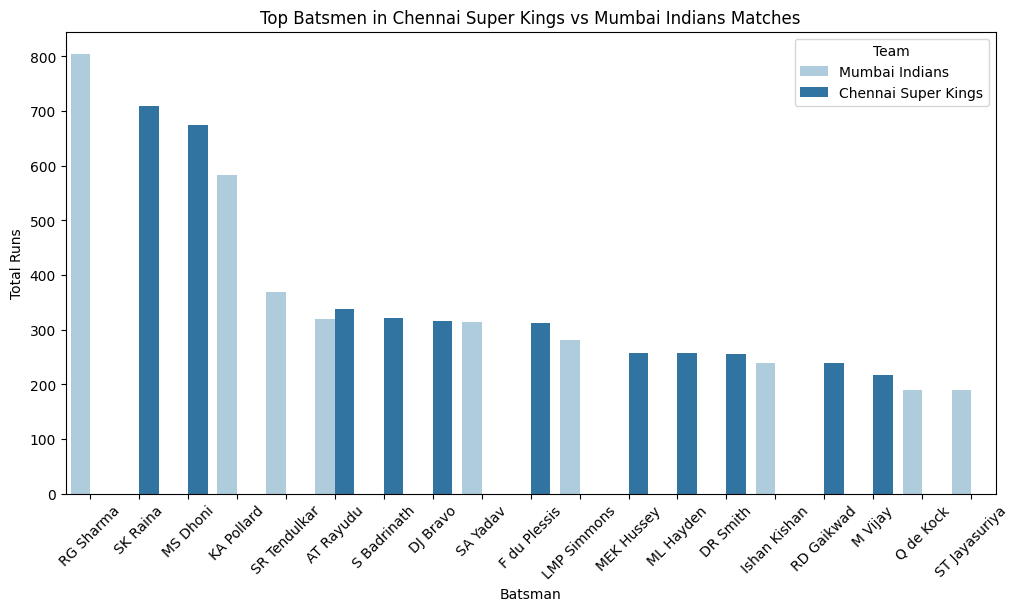

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

batsman_runs = head_to_head.groupby(['batter', 'batting_team'])['batsman_runs'].sum().reset_index()
top_batsmen = batsman_runs.nlargest(20, 'batsman_runs')
plt.figure(figsize=(12, 6))
batting_teams = top_batsmen['batting_team'].unique()

# Define a color palette (e.g., using a built-in Seaborn palette)
global_palette = "Paired"  # Or any other valid Seaborn palette name

sns.barplot(x='batter', y='batsman_runs', hue='batting_team', data=top_batsmen, palette=global_palette)
plt.title(f'Top Batsmen in {team1} vs {team2} Matches')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()

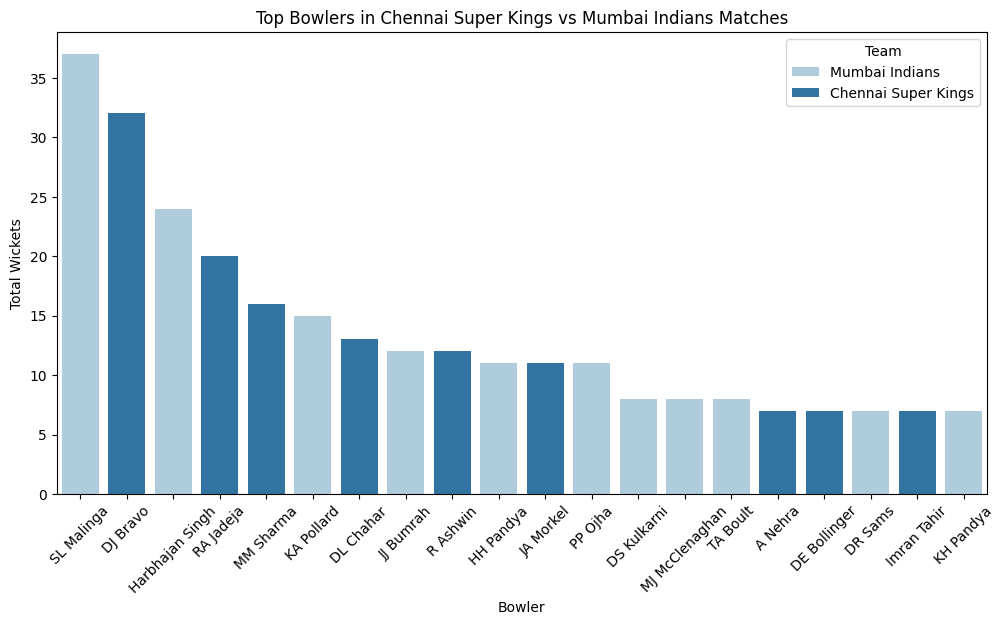

In [91]:
bowler_wickets = head_to_head[head_to_head['is_wicket'] == 1].groupby(['bowler', 'bowling_team']).size().reset_index(name='total_wickets')
top_bowlers = bowler_wickets.nlargest(20, 'total_wickets')
plt.figure(figsize=(12, 6))
bowling_teams = top_bowlers['bowling_team'].unique()
sns.barplot(x='bowler', y='total_wickets', hue='bowling_team', data=top_bowlers, palette=global_palette)
plt.title(f'Top Bowlers in {team1} vs {team2} Matches')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()

<ipython-input-92-adfe0bed5f19>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Toss Wins', data=toss_data, palette=global_palette)


Text(0, 0.5, 'Number of Toss Wins')

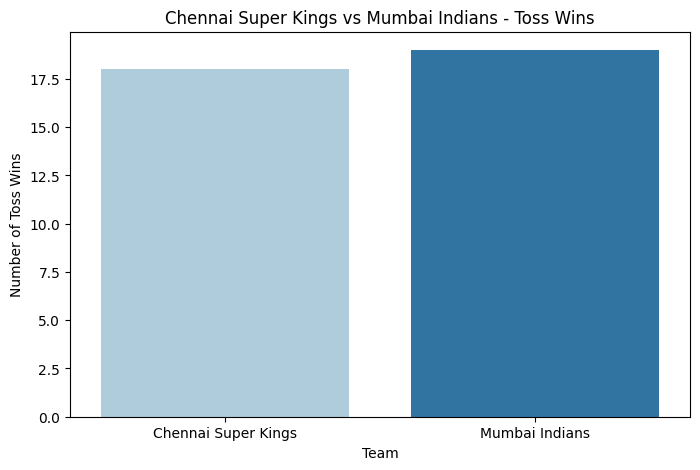

In [92]:
toss_data = pd.DataFrame({
    'Team': [team1, team2],
    'Toss Wins': [toss_wins_team1, toss_wins_team2]})
plt.figure(figsize=(8, 5))
sns.barplot(x='Team', y='Toss Wins', data=toss_data, palette=global_palette)
plt.title(f'{team1} vs {team2} - Toss Wins')
plt.xlabel('Team')
plt.ylabel('Number of Toss Wins')

<ipython-input-93-7d2be0dd436b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[team1, team2], y=[wins_team1, wins_team2],palette=global_palette)


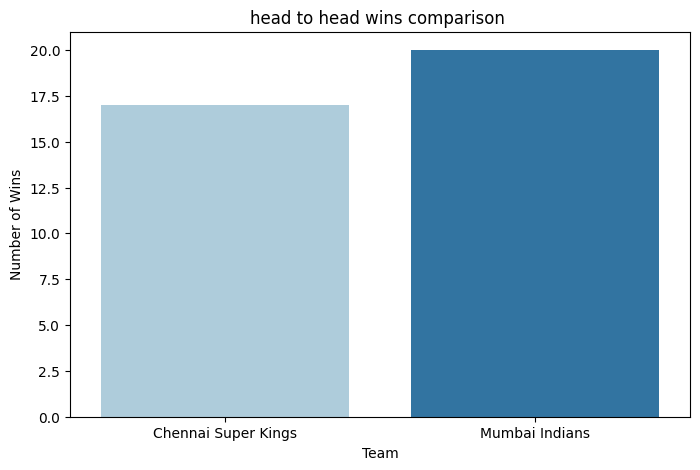

In [93]:
plt.figure(figsize=(8, 5))
sns.barplot(x=[team1, team2], y=[wins_team1, wins_team2],palette=global_palette)
plt.title(f'head to head wins comparison ')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()

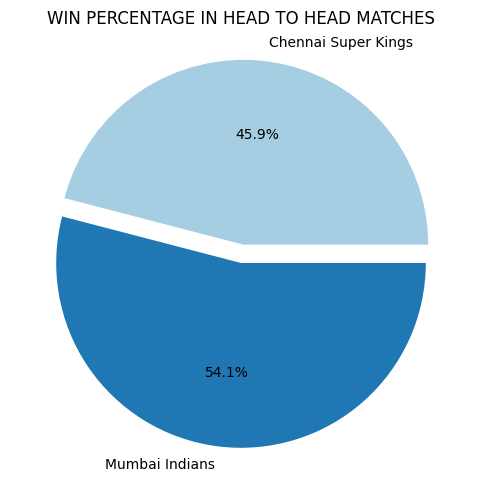

In [95]:
labels = [team1, team2]
sizes = [win_percentage_team1, win_percentage_team2]
# Get colors from the 'Paired' palette (adjust index as needed)
colors = [sns.color_palette(global_palette)[0], sns.color_palette(global_palette)[1]]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=[0.1,0])
plt.title(f'WIN PERCENTAGE IN HEAD TO HEAD MATCHES')
plt.show()

<ipython-input-97-81415780d28d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_to_head['season'] = pd.to_datetime(head_to_head['date']).dt.year


<Figure size 1000x600 with 0 Axes>

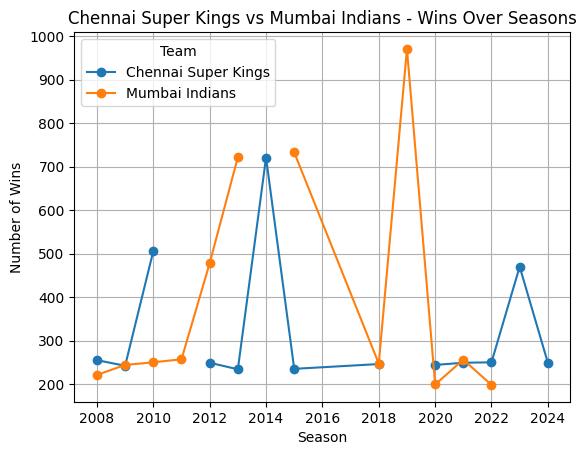

In [97]:
head_to_head['season'] = pd.to_datetime(head_to_head['date']).dt.year
# Changed 'winner' to 'Winner' to match the actual column name
wins_over_seasons = head_to_head.groupby(['season', 'Winner']).size().unstack() # Corrected column name to 'Winner'

plt.figure(figsize=(10, 6))
wins_over_seasons[[team1, team2]].plot(kind='line', marker='o')
plt.title(f'{team1} vs {team2} - Wins Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Team')
plt.grid(True)
plt.show()

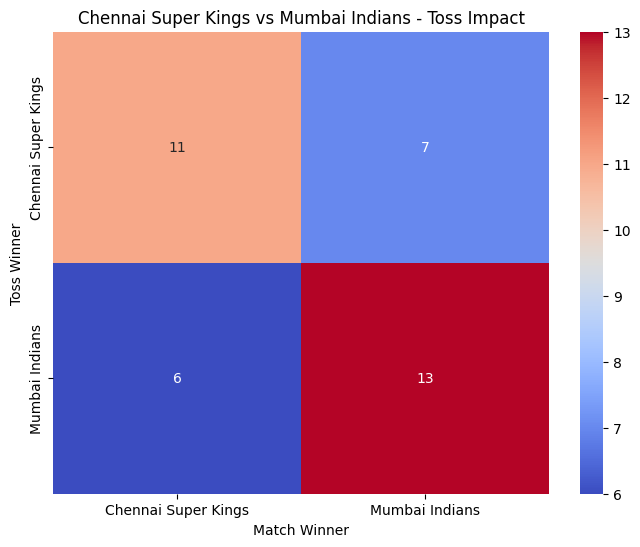

In [99]:
toss_impact = head_to_head.groupby(['Toss_Winner', 'Winner'])['id'].nunique().unstack().fillna(0) # Changed 'toss_winner' to 'Toss_Winner' and 'winner' to 'Winner'
for team in [team1, team2]:
    if team not in toss_impact.columns:
        toss_impact[team] = 0
toss_impact = toss_impact[[team1, team2]]
plt.figure(figsize=(8, 6))
sns.heatmap(toss_impact, annot=True, fmt='d', cmap='coolwarm')
plt.title(f'{team1} vs {team2} - Toss Impact')
plt.xlabel('Match Winner')
plt.ylabel('Toss Winner')
plt.show()

<ipython-input-102-e8baa59eb0a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_to_head['season'] = pd.to_datetime(head_to_head['date']).dt.year


<Figure size 1000x600 with 0 Axes>

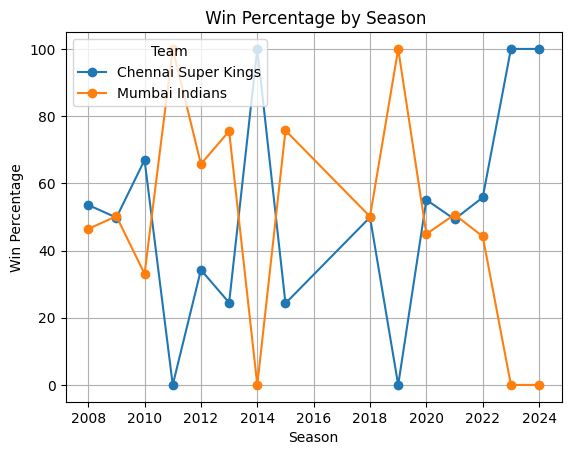

In [102]:
head_to_head['season'] = pd.to_datetime(head_to_head['date']).dt.year
# Changed 'winner' to 'Winner' to match the actual column name
wins_by_season = head_to_head.groupby(['season', 'Winner']).size().unstack().fillna(0) # Use 'Winner' instead of 'winner'
win_percentage_by_season = wins_by_season.div(wins_by_season.sum(axis=1), axis=0) * 100
plt.figure(figsize=(10, 6))
win_percentage_by_season[[team1, team2]].plot(kind='line', marker='o')
plt.title(f' Win Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend(title='Team')
plt.grid(True)
plt.show()

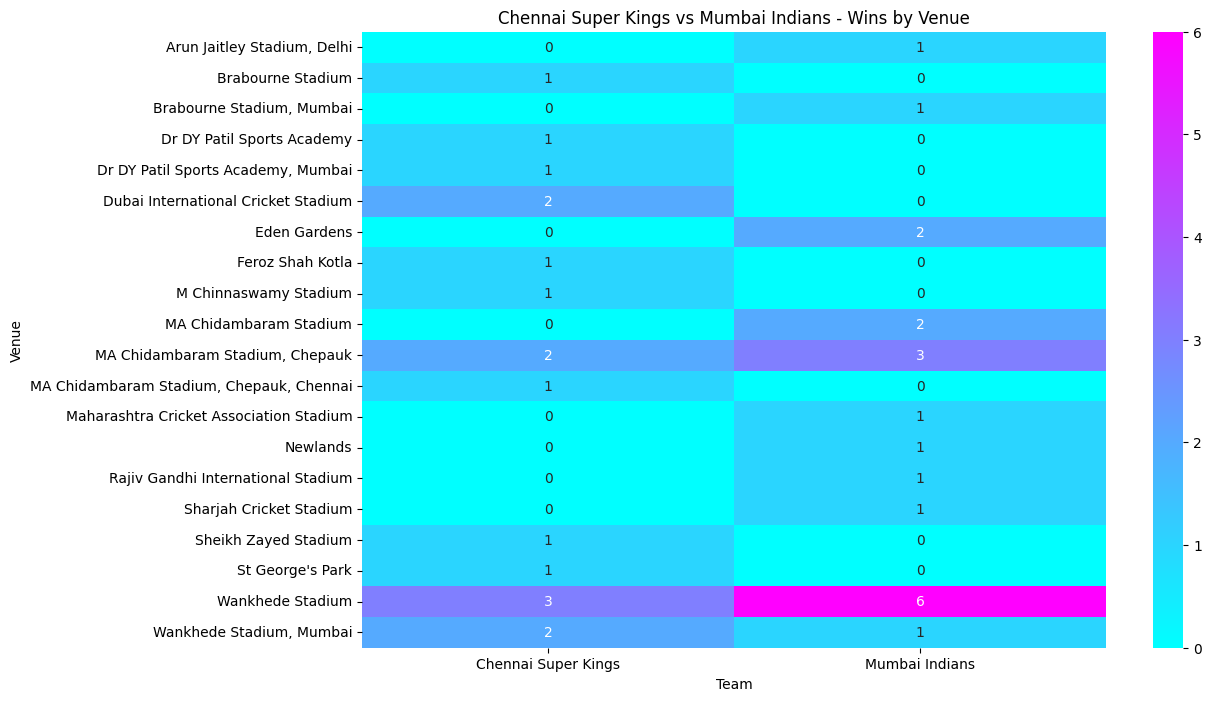

In [104]:
wins_by_venue = head_to_head.groupby(['venue', 'Winner'])['id'].nunique().unstack().fillna(0) # Changed 'winner' to 'Winner'
wins_by_venue = wins_by_venue[[team1, team2]]
plt.figure(figsize=(12, 8))
sns.heatmap(wins_by_venue, annot=True, cmap='cool')
plt.title(f'{team1} vs {team2} - Wins by Venue')
plt.xlabel('Team')
plt.ylabel('Venue')
plt.show()

Chennai Super Kings Total Runs: 5395
Mumbai Indians Total Runs: 5579


<ipython-input-111-a7e81de00d79>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[team1, team2], y=[team1_total_runs, team2_total_runs], palette=global_palette)


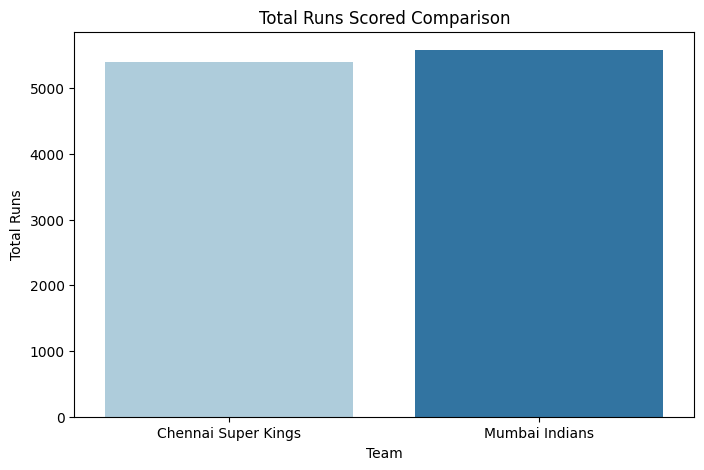

In [111]:
team1_total_runs = head_to_head[head_to_head['batting_team'] == team1]['batsman_runs'].sum()
team2_total_runs = head_to_head[head_to_head['batting_team'] == team2]['batsman_runs'].sum()
print(f"{team1} Total Runs: {team1_total_runs}")
print(f"{team2} Total Runs: {team2_total_runs}")
plt.figure(figsize=(8, 5))
sns.barplot(x=[team1, team2], y=[team1_total_runs, team2_total_runs], palette=global_palette)
plt.title(f'Total Runs Scored Comparison')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.show()

Chennai Super Kings Strike Rate: 119.97
Mumbai Indians Strike Rate: 125.97


<ipython-input-110-ca29e28e7c19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[team1, team2], y=[team1_strike_rate, team2_strike_rate], palette=global_palette)


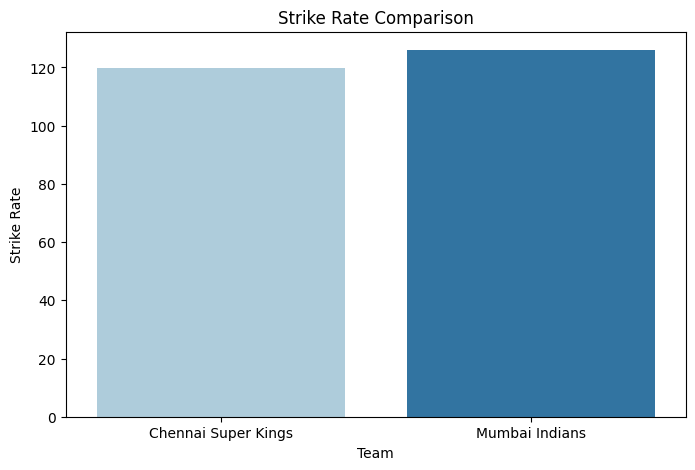

In [110]:
team1_strike_rate = (head_to_head[head_to_head['batting_team'] == team1]['batsman_runs'].sum() / head_to_head[head_to_head['batting_team'] == team1]['ball'].count()) * 100
team2_strike_rate = (head_to_head[head_to_head['batting_team'] == team2]['batsman_runs'].sum() / head_to_head[head_to_head['batting_team'] == team2]['ball'].count()) * 100

print(f"{team1} Strike Rate: {team1_strike_rate:.2f}")
print(f"{team2} Strike Rate: {team2_strike_rate:.2f}")
plt.figure(figsize=(8, 5))
sns.barplot(x=[team1, team2], y=[team1_strike_rate, team2_strike_rate], palette=global_palette)
plt.title(f'Strike Rate Comparison')
plt.xlabel('Team')
plt.ylabel('Strike Rate')
plt.show()


# **WIN PREDICTION AND TREND ANALYSIS**

<ipython-input-112-9ea77b723082>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_df.dropna(inplace=True)
<ipython-input-112-9ea77b723082>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_df[col] = encoder.fit_transform(matches_df[col])
<ipython-input-112-9ea77b723082>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

Model Accuracy: 47.71%

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65        37
           1       0.50      1.00      0.67         2
           2       0.20      0.14      0.17         7
           3       0.46      0.46      0.46        13
           4       0.50      0.40      0.44         5
           5       0.33      0.11      0.17         9
           6       0.37      0.41      0.39        17
           7       0.00      0.00      0.00         2
           8       0.50      0.52      0.51        23
           9       0.40      0.67      0.50         3
          10       0.50      0.54      0.52        26
          11       0.33      0.33      0.33         3
          12       0.00      0.00      0.00         3
          13       0.56      0.56      0.56        25
          14       0.50      0.25      0.33         4
          16       0.37      0.38      0.38        26
          17       0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-112-9ea77b723082>:55: FutureWarnin

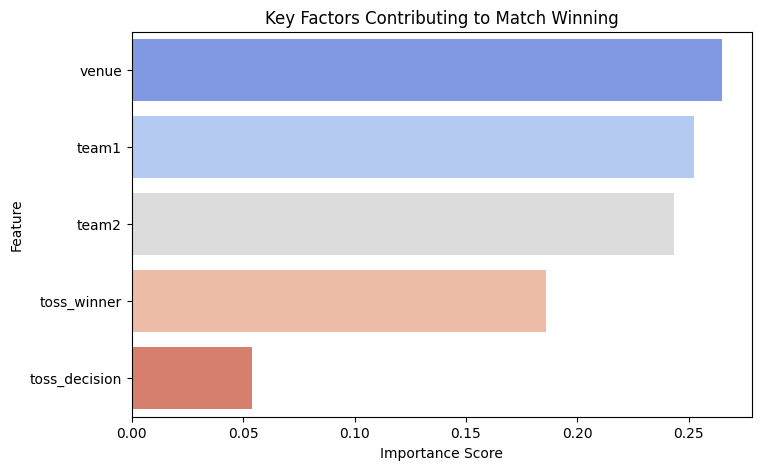

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the datasets
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')

# Selecting relevant features from matches dataset
matches_df = matches_df[['season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']]
matches_df.dropna(inplace=True)

# Encoding categorical variables
encoder = LabelEncoder()
for col in ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']:
    matches_df[col] = encoder.fit_transform(matches_df[col])

# Extracting batting and bowling performance features from deliveries dataset
batsman_performance = deliveries_df.groupby('batter')['batsman_runs'].sum().reset_index()
batsman_performance.rename(columns={'batsman_runs': 'total_runs'}, inplace=True)

bowler_performance = deliveries_df.groupby('bowler')['total_runs'].sum().reset_index()
bowler_performance.rename(columns={'total_runs': 'runs_conceded'}, inplace=True)

# Defining features (X) and target (y)
X = matches_df[['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']]
y = matches_df['winner']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Analyzing feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importance['Importance'], y=importance['Feature'], palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Key Factors Contributing to Match Winning")
plt.show()


**TOTAL MACHES PER PERSON**

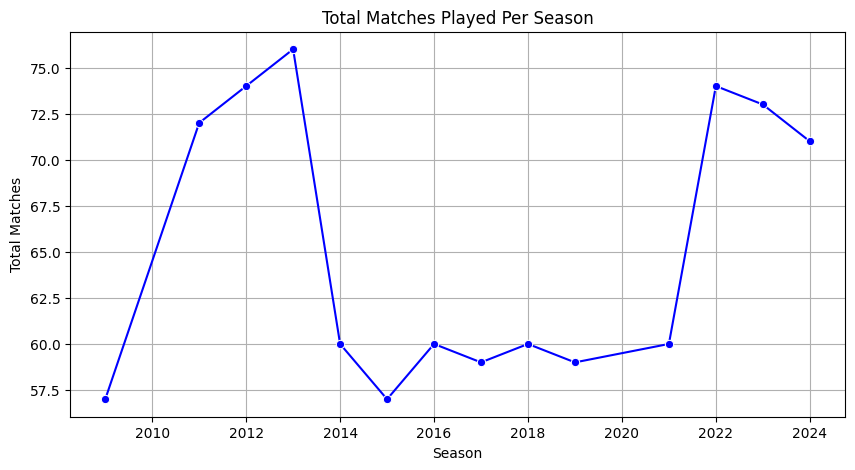

In [113]:
# Convert season to categorical type for ordering
matches_df['season'] = pd.to_numeric(matches_df['season'], errors='coerce').astype('Int64')

# Count total matches per season
matches_per_season = matches_df.groupby('season').size().reset_index(name='total_matches')

# Count team wins per season
team_wins_per_season = matches_df.groupby(['season', 'winner']).size().reset_index(name='wins')

# Plot trend of total matches per season
plt.figure(figsize=(10, 5))
sns.lineplot(x='season', y='total_matches', data=matches_per_season, marker='o', color='b')
plt.xlabel('Season')
plt.ylabel('Total Matches')
plt.title('Total Matches Played Per Season')
plt.grid()
plt.show()

**TOP WINNING TEAMS OVER SEASONS**

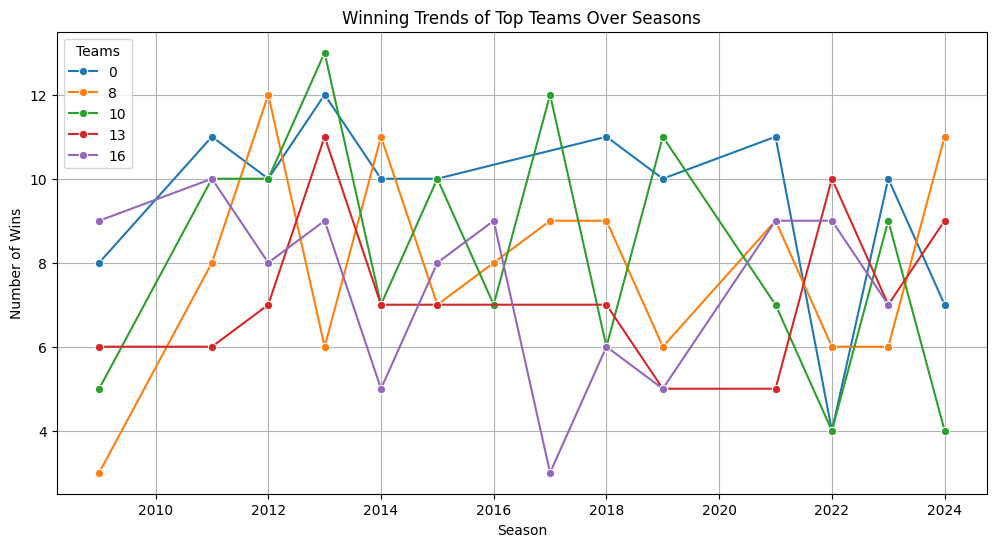

In [114]:
# Plot trend of top winning teams over seasons
top_teams = team_wins_per_season.groupby('winner')['wins'].sum().nlargest(5).index
filtered_team_wins = team_wins_per_season[team_wins_per_season['winner'].isin(top_teams)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='wins', hue='winner', data=filtered_team_wins, marker='o', palette='tab10')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.title('Winning Trends of Top Teams Over Seasons')
plt.legend(title="Teams")
plt.grid()
plt.show()

**WINNING TEAM FREQUENCY**

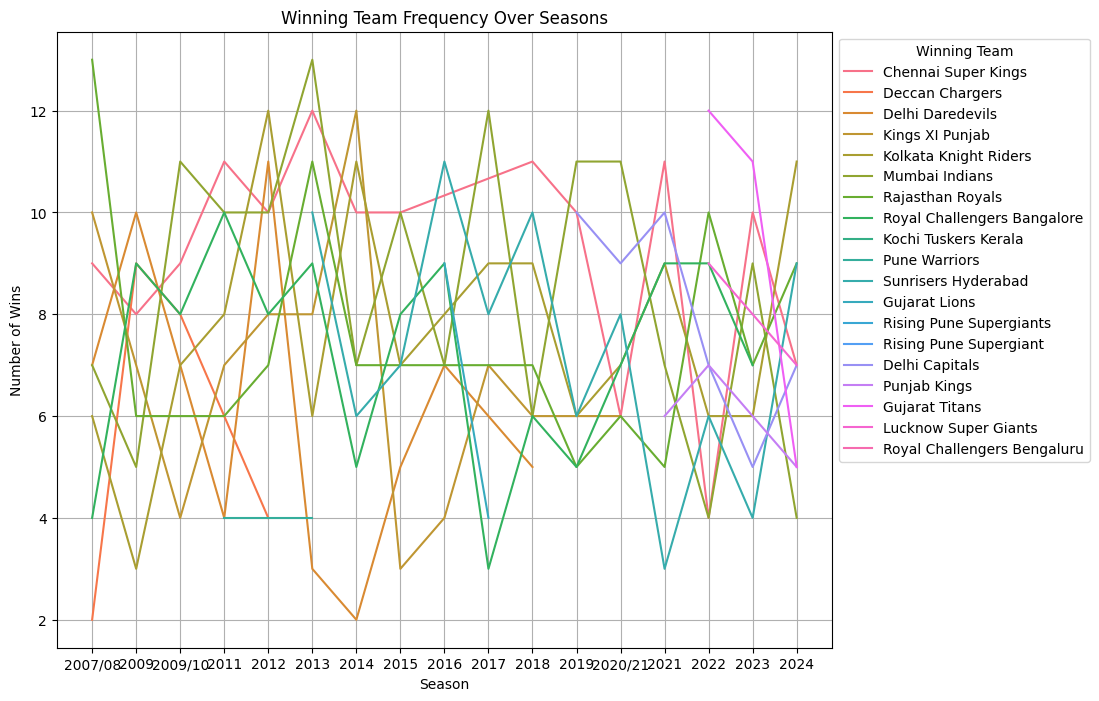

In [115]:
matches_df = pd.read_csv('matches.csv')
# Trend Analysis: Winning Team Frequency Over Seasons
winner_counts_by_season = matches_df.groupby(['season', 'winner'])['id'].count().reset_index()
plt.figure(figsize=(10, 8))
sns.lineplot(x='season', y='id', hue='winner', data=winner_counts_by_season)
plt.title('Winning Team Frequency Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Winning Team', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

**TOSS DECISION TRENDS OVER SEASONS**

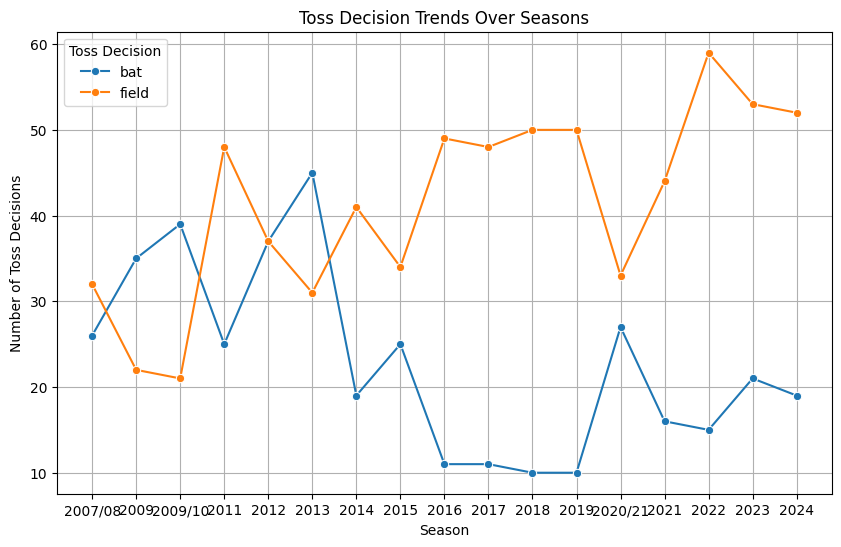

In [116]:
# Trend Analysis: Toss Decision Trends Over Seasons
toss_decision_trends = matches_df.groupby(['season', 'toss_decision'])['id'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='id', hue='toss_decision', data=toss_decision_trends, marker='o')
plt.title('Toss Decision Trends Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Toss Decisions')
plt.legend(title='Toss Decision')
plt.grid(True)
plt.show()

**TOTAL RUNS SCORED OVER SEASONS**

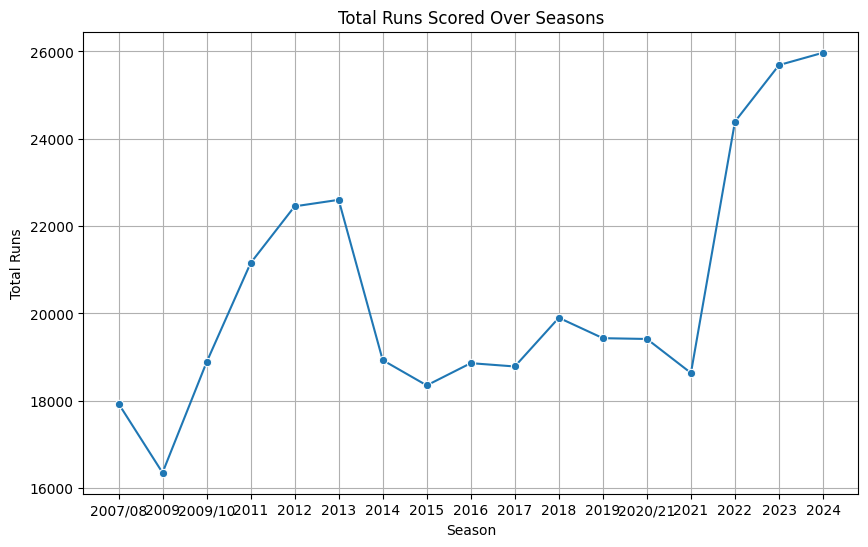

In [117]:
# Trend Analysis: Total Runs Scored Over Seasons
total_runs_per_season = deliveries_df.merge(matches_df, left_on='match_id', right_on='id').groupby('season')['total_runs'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='total_runs', data=total_runs_per_season, marker='o')
plt.title('Total Runs Scored Over Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.grid(True)
plt.show()

**AVERAGE RUNS SCORED PER MATCH**

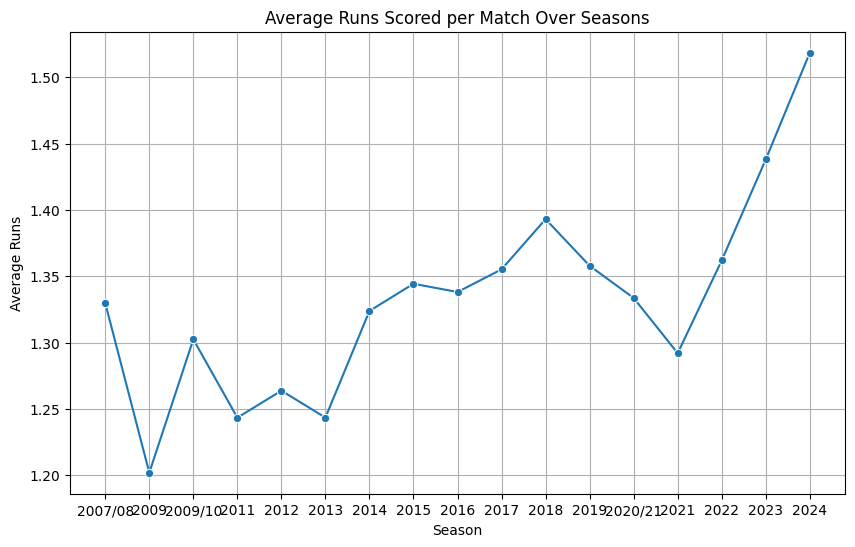

In [118]:
# Trend Analysis: Average Runs Scored per Match Over Seasons
average_runs_per_season = deliveries_df.merge(matches_df, left_on='match_id', right_on='id').groupby('season')['total_runs'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='total_runs', data=average_runs_per_season, marker='o')
plt.title('Average Runs Scored per Match Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.grid(True)
plt.show()

**VENUE IMPACT**

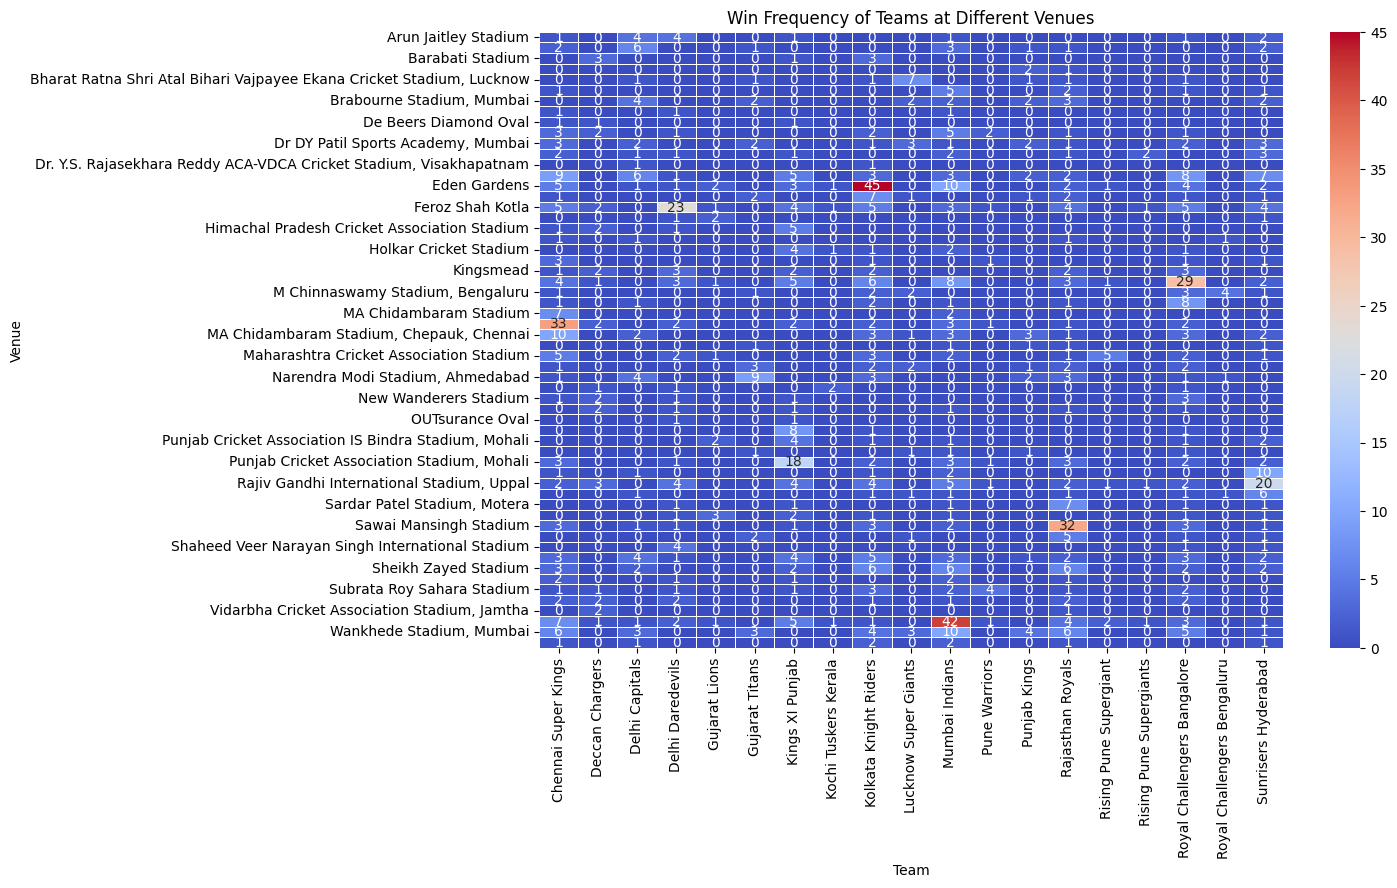

In [119]:
# Analyze the win frequency of teams at different venues.
wins_by_venue = matches_df.groupby(['venue', 'winner'])['id'].nunique().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(wins_by_venue, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Team")
plt.ylabel("Venue")
plt.title("Win Frequency of Teams at Different Venues")
plt.show()


**TOSS IMPACT**

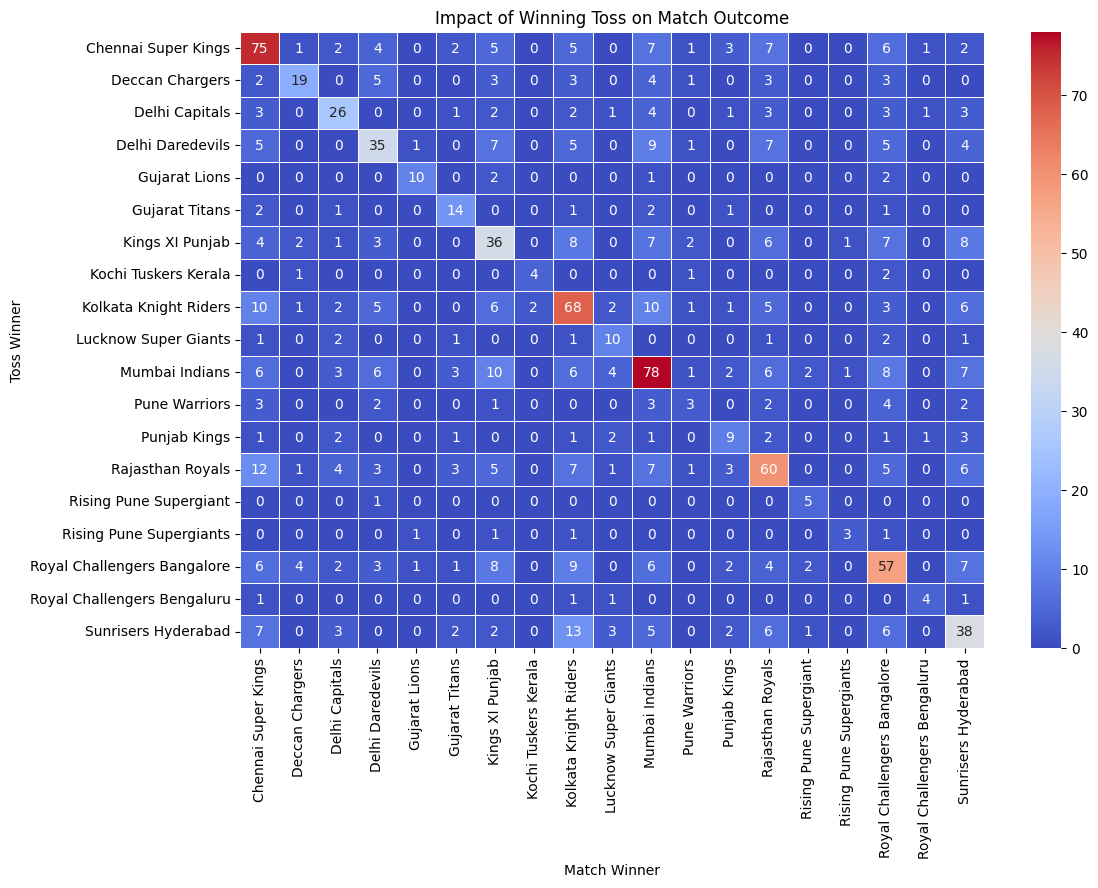

In [120]:
# Analyze the relationship between winning the toss and winning the match.
toss_impact = matches_df.groupby(['toss_winner', 'winner'])['id'].nunique().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(toss_impact, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Match Winner")
plt.ylabel("Toss Winner")
plt.title("Impact of Winning Toss on Match Outcome")
plt.show()


**EXAMPLE ANALYSIS FOR VENUE IMPACT**

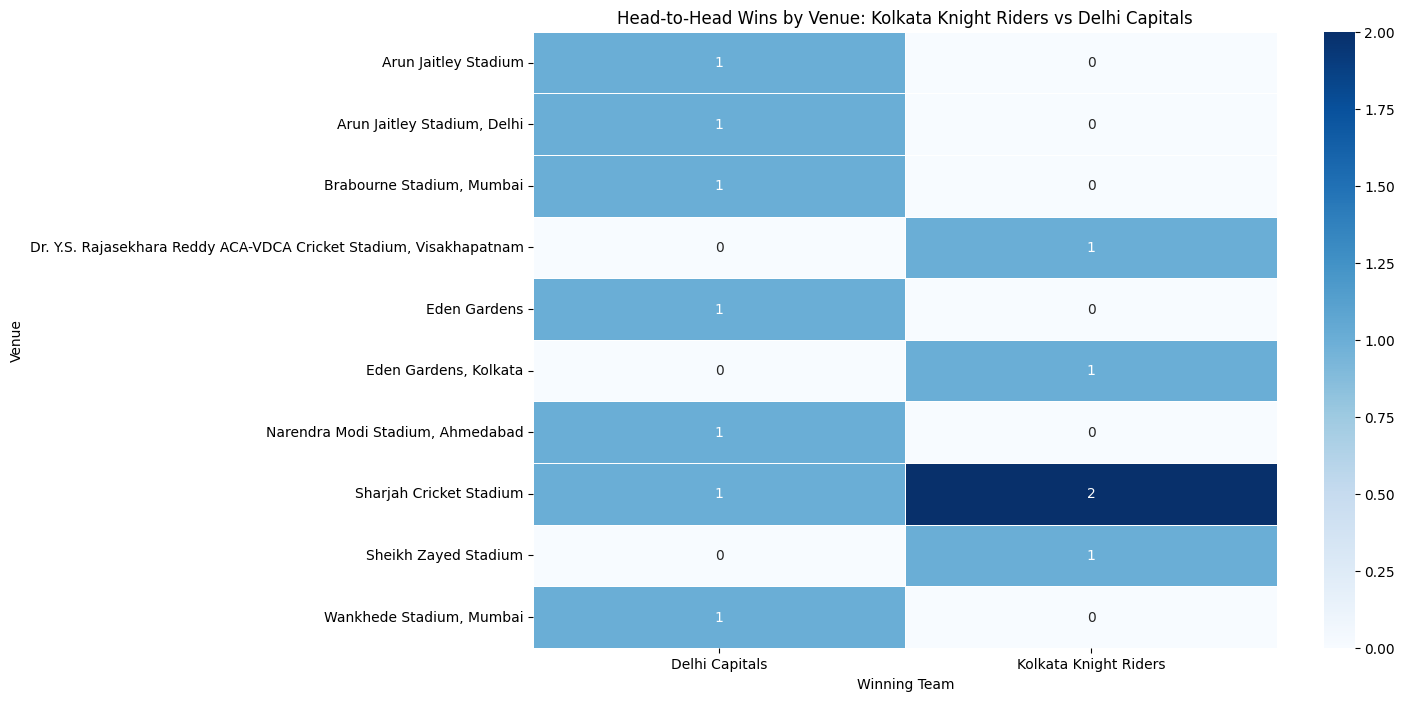

In [121]:
team1 = 'Kolkata Knight Riders'
team2 = 'Delhi Capitals'
head_to_head_venue = matches_df[((matches_df['team1'] == team1) & (matches_df['team2'] == team2)) |
                               ((matches_df['team1'] == team2) & (matches_df['team2'] == team1))]
wins_by_venue = head_to_head_venue.groupby(['venue', 'winner']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(wins_by_venue, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Winning Team")
plt.ylabel("Venue")
plt.title(f"Head-to-Head Wins by Venue: {team1} vs {team2}")
plt.show()